In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
from statistics import mode

### 1. Exploring the data.
  * Address the missing values (and any outliers). 
  * Measure inter-annotator agreement in the *polarity* and *hero* columns.

---

First we want to add all the excel files from the annotators in a single data frame. To do this we will use the os library.

In [2]:
# T1

path = './IB1-annotated'
filenames = [] # initialize the list we will keep the annotators' IDs
for file in os.listdir(path):  # loop over the files in the folder IB1-annotated which is in the folder that we work
    if file[-5:] == ".xlsx":  # we need only the excel files
        filenames.append(file)

In [3]:
filenames # we check that we have done the work correctly

['3150014.xlsx',
 '3252107.xlsx',
 '3252108.xlsx',
 '3252113.xlsx',
 '335201.xlsx',
 '3352106.xlsx',
 '3352114.xlsx',
 '3352115.xlsx',
 '3352116.xlsx',
 '3352119.xlsx']

In [4]:
annotator = [] # initialize the list where we will keep the ID's of annotators for every row
cod = {}
for file in filenames:   # iterate through the files of annotators
    if file == filenames[0]:

        coders = pd.read_excel(path + '/' + file, index_col=0) # we read the first file and create the coders data frame with this file 
                                                  # with the first column as index (Id_verse)
        annotator.extend(file[:-5] for i in range(len(coders))) # we keep the first annotator once for every row in this file
        
    else:
        cod = pd.read_excel(path + '/' + file, index_col=0) # we read every file in the filenames after the first and create a data frame
                                               # with the first column as index (Id_verse)
        coders = pd.concat([coders, cod]) # we concatenate the coders data frame with the data frame of the file we are in
        
        annotator.extend(file[:-5] for i in range(len(cod))) # we keep the annotator 

C:\Users\User\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [5]:
coders.sample(10) # we check 10 random rows from our data frame to have an idea

polarity   emotions  \
verse                                                                       
κι η κόρη αθέλητα της πήγαινε μαζί τους. Δακρυσ...    negative      mercy   
πετάει και πάει του Δία, στον Όλυμπο, με τους θ...    positive     relief   
τι ο Δίας επήγε χτες στους άψεγους Αιθίοπες καλ...    positive        joy   
τι πάντα πόλεμοι σου αρέσουνε, συνερισιές κι αμ...    negative      anger   
κι ήβρε στου Ολύμπου του πολύκορφου την πιο αψη...  no emotion        NaN   
αυτός μας στέκει κάστρο ατράνταχτο μες στη σφαγ...    positive  awareness   
και τότε μίλησε καλόγνωμος αναμεσό τους κι είπε:      positive        joy   
να κάθεται, κι ουδέ το χάρηκε να τους ιδεί μπροστά  no emotion        NaN   
που πιο γλυκά άπ᾿ το μέλι ανάβρυζαν τα λόγια το...    positive   distress   
από το πάθος, και τα μάτια του σαν τη φωτιά ξασ...    negative      worry   

                                                         hero Unnamed: 4  \
verse                                                                      
κι η κόρη αθέλητα της πήγαινε μαζί τους. Δακρυσ...        NaN        NaN   
πετάει και πάει του Δία, στον Όλυμπο, με τους θ...        NaN        NaN   
τι ο Δίας επήγε χτες στους άψεγους Αιθίοπες καλ...     Thetis        NaN   
τι πάντα πόλεμοι σου αρέσουνε, συνερισιές κι αμ...  Agamemnon        NaN   
κι ήβρε στου Ολύμπου του πολύκορφου την πιο αψη...        NaN        NaN   
αυτός μας στέκει κάστρο ατράνταχτο μες στη σφαγ...     Nestor        NaN   
και τότε μίλησε καλόγνωμος αναμεσό τους κι είπε:    Achilleus        NaN   
να κάθεται, κι ουδέ το χάρηκε να τους ιδεί μπροστά        NaN        NaN   
που πιο γλυκά άπ᾿ το μέλι ανάβρυζαν τα λόγια το...        NaN        NaN   
από το πάθος, και τα μάτια του σαν τη φωτιά ξασ...        NaN        NaN   

                                                    Unnamed: 5  Unnamed: 6  \
verse                                                                        
κι η κόρη αθέλητα της πήγαινε μαζί τους. Δακρυσ...         NaN         NaN   
πετάει και πάει του Δία, στον Όλυμπο, με τους θ...         NaN         NaN   
τι ο Δίας επήγε χτες στους άψεγους Αιθίοπες καλ...         NaN         NaN   
τι πάντα πόλεμοι σου αρέσουνε, συνερισιές κι αμ...         NaN         NaN   
κι ήβρε στου Ολύμπου του πολύκορφου την πιο αψη...         NaN         NaN   
αυτός μας στέκει κάστρο ατράνταχτο μες στη σφαγ...         NaN         NaN   
και τότε μίλησε καλόγνωμος αναμεσό τους κι είπε:           NaN         NaN   
να κάθεται, κι ουδέ το χάρηκε να τους ιδεί μπροστά         NaN         NaN   
που πιο γλυκά άπ᾿ το μέλι ανάβρυζαν τα λόγια το...         NaN         NaN   
από το πάθος, και τα μάτια του σαν τη φωτιά ξασ...         NaN         NaN   

                                                    Unnamed: 7  
verse                                                           
κι η κόρη αθέλητα της πήγαινε μαζί τους. Δακρυσ...         NaN  
πετάει και πάει του Δία, στον Όλυμπο, με τους θ...         NaN  
τι ο Δίας επήγε χτες στους άψεγους Αιθίοπες καλ...         NaN  
τι πάντα πόλεμοι σου αρέσουνε, συνερισιές κι αμ...         NaN  
κι ήβρε στου Ολύμπου του πολύκορφου την πιο αψη...         NaN  
αυτός μας στέκει κάστρο ατράνταχτο μες στη σφαγ...         NaN  
και τότε μίλησε καλόγνωμος αναμεσό τους κι είπε:           NaN  
να κάθεται, κι ουδέ το χάρηκε να τους ιδεί μπροστά         NaN  
που πιο γλυκά άπ᾿ το μέλι ανάβρυζαν τα λόγια το...         NaN  
από το πάθος, και τα μάτια του σαν τη φωτιά ξασ...         NaN

In [6]:
coders["ID"] = annotator # add the column ID with the annotator ar every verse in the last column

In [7]:
coders.reset_index(inplace=True) # we reset the index in order to do our cleaning more easily

In [8]:
print(f"The total rows of the data frame: {len(coders)}")

The total rows of the data frame: 5890


In [9]:
coders.isna().sum() # check the NaN values for every row in the data frame

verse            0
polarity       199
emotions      1297
hero          1748
Unnamed: 4    5770
Unnamed: 5    5890
Unnamed: 6    5890
Unnamed: 7    5890
ID               0
dtype: int64

We do not have any missing values in `verse` column. However, we do have some missing values in `polarity` column and we have a lot of missing values in `emotions` and `hero` columns.

Also, we have a column that has no meaning but there are some annotations there. So we first see what there is in that row.

In [10]:
coders[coders["Unnamed: 4"].notna()] # we check the data frame with only the not na in Unnamed: 4 column

verse    polarity  \
3549  « Του Ατρέα βλαστάρια κι αποδέλοιποι καλαντρει...    negative   
3551  του Πρίαμου το καστρί, με το καλό να γύρτε στη...    positive   
3602  « Αρχοντικέ Αχιλλέα, προστάζεις με να σας ξηγή...    negative   
3603     του ρήγα Απόλλωνα τη μάνητα του μακροσαγιτάρη.    negative   
3604  Ναι, θα μιλήσω, μα στοχάσου το και συ πιο πριν...    negative   
...                                                 ...         ...   
5604  πολλά, στης άκαρπης της θάλασσας μπροστά το γυ...    negative   
5605  κι η κνίσα ανέβαινε στρουφίζοντας με τον καπνό...    negative   
5606  την όχτρητα και τι φοβέρισε στον Αχιλλέα να κά...    negative   
5607  κι ευτύς τον Ευρυβάτη εφώναξε και τον Ταλθύβιο...    negative   
5608  τους δυο διαλάληδες και πρόθυμους παραστεκάμεν...  no emotion   

             emotions hero Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
3549          empathy  NaN    CHRISIS         NaN         NaN         NaN   
3551            pride  NaN    CHRISIS         NaN         NaN         NaN   
3602          anxiety  NaN     Kalhas         NaN         NaN         NaN   
3603            worry  NaN     Kalhas         NaN         NaN         NaN   
3604         distress  NaN     Kalhas         NaN         NaN         NaN   
...               ...  ...        ...         ...         ...         ...   
5604            shame  NaN       Muse         NaN         NaN         NaN   
5605          anxiety  NaN       Muse         NaN         NaN         NaN   
5606            worry  NaN       Muse         NaN         NaN         NaN   
5607          anxiety  NaN       Muse         NaN         NaN         NaN   
5608  acknowledgement  NaN       Muse         NaN         NaN         NaN   

           ID  
3549  3352114  
3551  3352114  
3602  3352114  
3603  3352114  
3604  3352114  
...       ...  
5604  3352119  
5605  3352119  
5606  3352119  
5607  3352119  
5608  3352119  

[120 rows x 9 columns]

In [11]:
coders[coders["Unnamed: 4"].notna()]["Unnamed: 4"].value_counts() # we check the values in this column we work

Muse       71
Calchas    22
Kalhas     18
Hrisis      7
CHRISIS     2
Name: Unnamed: 4, dtype: int64

We see that this column contains only hero names. So we could merge this column with the hero column, but first we need to check if in the respective rows, the hero column is empty.

In [12]:
coders.hero.value_counts() # check the values at hero column

Achilleus     1631
Agamemnon      693
Thetis         338
Nestor         298
Zeus           276
Hephaestus     213
Hera           142
Apollo         112
Athena         100
Odysseus        93
Chryses         51
Homer           43
Kalchas         36
Patroclus       32
Calchas         18
Kalhas          18
Chrysis         17
Phobos          12
Menelaus         7
Briseis          5
Andromache       4
Iris             2
Antenor          1
Name: hero, dtype: int64

In [13]:
# check in the rows with a hero name in Unnamed:4 how many NaN values exist in the respective hero column
coders[coders["Unnamed: 4"].notna()].hero.isna().sum() 

120

We see that in the rows where we have a name at the Unnamed column, the hero column has NaN value. So we can proceed in the merging.

In [14]:
ind = coders[coders["Unnamed: 4"].notna()].index # keep the index with not NaN value at the Unnamed column
for i in ind:
    coders.at[i, 'hero'] = coders.at[i, "Unnamed: 4"] # put at that index at hero column the value of the Unnamed column

The `pd.at()` method which does exactly what I wanted I found it from this answer at stack overflow: https://stackoverflow.com/a/13842286. The arguments of this function is the index of the value we want to change and the column we want. 

In [15]:
coders.hero.value_counts()

Achilleus     1631
Agamemnon      693
Thetis         338
Nestor         298
Zeus           276
Hephaestus     213
Hera           142
Apollo         112
Athena         100
Odysseus        93
Muse            71
Chryses         51
Homer           43
Calchas         40
Kalhas          36
Kalchas         36
Patroclus       32
Chrysis         17
Phobos          12
Menelaus         7
Hrisis           7
Briseis          5
Andromache       4
Iris             2
CHRISIS          2
Antenor          1
Name: hero, dtype: int64

In [16]:
coders.drop(coders.columns[-2], axis=1, inplace=True) # we drop the Unnamed column which now is at the -2 place, because the 
                                                        # last place is the ID column

We see that there are some spelling errors in the hero's names. Also, the instruction to the annotators was that if the narrator speaks then they should leave blank the hero column. So the NaN values are recoded to the narrator.

In [17]:
coders.loc[(coders.hero.str.contains('Kalhas', na=False)), "hero"] =  "Calchas"
coders.loc[(coders.hero.str.contains('Kalchas', na=False)), "hero"] =  "Calchas"
coders.loc[(coders.hero.str.contains('Hrisis', na=False)), "hero"] =  "Chrysis"
coders.loc[(coders.hero.str.contains('CHRISIS', na=False)), "hero"] =  "Chrysis"
coders.loc[(coders.hero.str.contains('Homer', na=False)), "hero"] = "narrator"
coders.loc[(coders.hero.isna()), "hero"] = "narrator"

In [18]:
coders.hero.value_counts()

narrator      1671
Achilleus     1631
Agamemnon      693
Thetis         338
Nestor         298
Zeus           276
Hephaestus     213
Hera           142
Apollo         112
Calchas        112
Athena         100
Odysseus        93
Muse            71
Chryses         51
Patroclus       32
Chrysis         26
Phobos          12
Menelaus         7
Briseis          5
Andromache       4
Iris             2
Antenor          1
Name: hero, dtype: int64

We have also some outlier values, names that exist very few times in the data set. We could address this issue by merge these names in one value `Other heros`. But, this recoding may change the inter annotator percentage agreement that we will calculate later on, so we will do this after that.

In [19]:
coders.isna().sum() 

verse            0
polarity       199
emotions      1297
hero             0
Unnamed: 4    5770
Unnamed: 5    5890
Unnamed: 6    5890
ID               0
dtype: int64

We have addressed the NaN's at hero column. Now we will proceed at the polarity column.

In [20]:
coders.polarity.value_counts() # check the values of polarity column

negative        2328
positive        2110
no emotion      1181
out of scope      72
Name: polarity, dtype: int64

The NaN values we can add them to the `out of scope` values because there are not a lot.

In [21]:
coders.loc[(coders.polarity.isna()), "polarity"] = "out of scope"
coders.polarity.value_counts() # check the value counts of polarity

negative        2328
positive        2110
no emotion      1181
out of scope     271
Name: polarity, dtype: int64

In [22]:
coders.isna().sum()  # check the NaN values

verse            0
polarity         0
emotions      1297
hero             0
Unnamed: 4    5770
Unnamed: 5    5890
Unnamed: 6    5890
ID               0
dtype: int64

Now we have NaN values only at the `emotions` column.

In [23]:
coders.emotions.value_counts() # check the values of emotions 

anger          393
admiration     358
distress       244
joy            236
suspense       232
              ... 
self denial      1
humaliation      1
retreat          1
submission       1
dispassion       1
Name: emotions, Length: 69, dtype: int64

In [24]:
coders.emotions.unique() # see all the discrete values of emotions 

array(['admiration', 'pain', 'awe', 'fear', 'acknowledgement', 'suspense',
       'sadness', 'question', 'worry', nan, 'anger', 'satisfaction',
       'reproach', 'shock', 'joy', 'remorse', 'complaint', 'compassion',
       'relief', 'anxiety', 'empathy', 'fury', 'pride', 'hate',
       'injustice', 'surprise', 'respect', 'humiliation', 'distress',
       'love', 'mercy', 'hope', 'shame', 'willingness', 'homesickness',
       'irony/sarcasm', 'sorrow', 'bravery', 'affinity', 'despair',
       'jealousy', 'disdain', 'awareness', 'longing', 'Being moved',
       'confidence', 'rejection', 'grief', 'certainty', 'submission',
       'revenge', 'request', 'irony', 'impiety', 'threatening', 'claim',
       'self denial', 'justice', 'retreat', 'insecurity', 'self pity',
       'grudge', 'expectation', 'guilt', 'humaliation', 'being moved',
       'Self pity', 'dispassion', 'Self denial', 'loneliness'],
      dtype=object)

There are some same words with different spelling. We need to address this problem, by changing these words.

In [25]:
coders.loc[(coders.emotions.str.contains('Being moved', na=False)), "emotions"] =  "being moved"
coders.loc[(coders.emotions.str.contains('Self pity', na=False)), "emotions"] =  "self pity"
coders.loc[(coders.emotions.str.contains('Self denial', na=False)), "emotions"] =  "self denial"
coders.loc[(coders.emotions.str.contains('humaliation', na=False)), "emotions"] =  "humiliation"

coders.emotions.value_counts()

anger         393
admiration    358
distress      244
joy           236
suspense      232
             ... 
revenge         1
dispassion      1
retreat         1
submission      1
claim           1
Name: emotions, Length: 65, dtype: int64

In [26]:
coders.isna().sum()

verse            0
polarity         0
emotions      1297
hero             0
Unnamed: 4    5770
Unnamed: 5    5890
Unnamed: 6    5890
ID               0
dtype: int64

In [27]:
coders.emotions.value_counts()

anger         393
admiration    358
distress      244
joy           236
suspense      232
             ... 
revenge         1
dispassion      1
retreat         1
submission      1
claim           1
Name: emotions, Length: 65, dtype: int64

We still have some NaN values, almost the 1/4 of all the rows. To address that effectively we can think some how in a complex way. So for every unique verse in the data frame, we iterate through the `NaN` values of `emotions` for this verse. Then, we check the `polarity`. If the `polarity` is positive then we replace the `NaN` value with the most frequent emotion for every other positive sentiment, otherwise we do the same thing for the negative emotions. If the `polarity` is neither positive nor negative we replace the `emotion` with `unknown emotion`.

In [28]:
for ver in coders.verse.unique(): # iterate through all the unique verses of the data frame
    
    # keep a temporary data frame only for this verse (for all the annotators) we are at 
    # with columns polarity, emotions, hero (we do not keep the verse column)
    temp_data = coders[coders.verse == ver][["polarity", "emotions", "hero"]]
    
    for i in temp_data[temp_data.emotions.isna()].index: # iterate through the indexes of non NaN values of emotions
        
        # if all the emotions have NaN values put "unknown emotion" for this verse for all annotators
        if temp_data.emotions.isna().sum() == len(temp_data.emotions): 
            coders.at[i, "emotions"] = "unknown emotion"
        else:
            # if the respective polarity is positive, change the emotion to be the most frequent positive emotion from the others
            if (temp_data.polarity.loc[i] == "positive") and (len(temp_data[temp_data.polarity=='positive'].emotions.dropna())>0):
                coders.at[i, "emotions"] = mode(temp_data[temp_data.polarity=="positive"].emotions.dropna())
                
            # if the respective polarity is negative, change the emotion to be the most frequent negative emotion from the others
            elif (temp_data.polarity.loc[i] == "negative") and (len(temp_data[temp_data.polarity=='negative'].emotions.dropna())>0):
                coders.at[i, "emotions"] = mode(temp_data[temp_data.polarity=="negative"].emotions.dropna())
                
            # if the respective polarity is neither positive nor negative put "unknown enotion"
            else:
                coders.at[i, "emotions"] = "unknown emotion"


In [29]:
coders.isna().sum() # check the NaN values

verse            0
polarity         0
emotions         0
hero             0
Unnamed: 4    5770
Unnamed: 5    5890
Unnamed: 6    5890
ID               0
dtype: int64

We do not have any missing values. 

In [30]:
coders.emotions.value_counts() # check the value counts for emotions

unknown emotion    1178
anger               413
admiration          360
distress            256
joy                 236
                   ... 
revenge               1
dispassion            1
retreat               1
submission            1
claim                 1
Name: emotions, Length: 66, dtype: int64

We have a lot unclear sentiments, indicating that annotators have not specified the emotion for many verses.

Now we are ready to calculate the percentage agreement for `polarity` and for `hero`. 

First we chack that all the annotators have annotated the same number of verses

In [31]:
coders.set_index(["ID", "verse"], inplace=True) # create an hierarchical index

In [32]:
for ann in coders.index.get_level_values('ID').unique(): # iterate through the unique annotators' ID
    print("length of ", ann, "=", len(coders.polarity[ann])) # print the number of rows for every annotator

length of  3150014 = 589
length of  3252107 = 589
length of  3252108 = 589
length of  3252113 = 589
length of  335201 = 589
length of  3352106 = 589
length of  3352114 = 589
length of  3352115 = 589
length of  3352116 = 589
length of  3352119 = 589


In [33]:
N = len(coders.polarity["3150014"]) # number of verses annotated
annot = coders.index.get_level_values("ID").unique() # keep the ID's of the annotators

In [34]:
#we check the agreement at the hero column. 

s = 0 # keep the sum of mean agreement for every pair of annotators
for i in range(len(annot)-1): # start from the first annotator going before the last
    for j in range(i+1, len(annot)): # check all the next annotators
        s += np.mean(coders.loc[[annot[i]]].reset_index().polarity == coders.loc[[annot[j]]].reset_index().polarity)
print(f"The mean inter annotator agreement in polarity is: {s / math.comb(len(annot),2)*100:.2f}%.")

The mean inter annotator agreement in polarity is: 41.07%.


In [35]:
#we check the agreement at the hero column. 

s = 0 # keep the sum of each agreement score per pair
for i in range(len(annot)-1):
    for j in range(i+1, len(annot)):
        agr = np.mean(coders.loc[[annot[i]]].reset_index().hero == coders.loc[[annot[j]]].reset_index().hero)
        s += agr
        #print(f"The aggrement between annotator in hero column between {annot[i]} and {annot[j]}: {agr*100:.2f}%")
print(f"The mean inter annotator agreement in hero is: {s / math.comb(len(annot),2)*100:.2f}%.")

The mean inter annotator agreement in hero is: 73.90%.


For the inter annotator agreement we use the classic method of percentage agreement, in which we calculate the average of same values for sentiment per pair of annotators. This method is not taking into account the chance agreement but it is some how easier to understand it than the Cohen's Kappa for example.

We have less than 50% agreement between annotators in the polarity column. On the other hand we have much larger agreement in hero column. This is some how natural, because the sentiment is subjective, while the hero who speaks is objective. 

We will address the outliers now for `emotions` and `hero` columns.

In [36]:
coders.reset_index(inplace=True) # we reset the index in order to do the job more easily

In [37]:
# keep a list of all emotions that we think as outliers and we will replace them with "other emotion"
# we think as outliers all the emotions that have value count under the median value count of all emotions

list_outliers_emot = coders.emotions.value_counts()[coders.emotions.value_counts()<coders.emotions.value_counts().median()].index
for emot in list_outliers_emot:
    coders.loc[(coders.emotions.str.contains(emot, na=False)), "emotions"] = "other emotion"

In [38]:
coders.emotions.value_counts() # check the value counts

unknown emotion    1178
anger               413
admiration          360
other emotion       347
distress            256
suspense            236
joy                 236
sadness             206
awe                 182
fear                182
hope                182
acknowledgement     177
respect             161
worry               147
shame               129
pain                125
pride               122
relief              116
anxiety             116
satisfaction        114
hate                106
compassion           95
despair              88
mercy                83
love                 73
empathy              73
humiliation          67
sorrow               62
question             58
complaint            50
awareness            49
reproach             43
grudge               29
fury                 29
Name: emotions, dtype: int64

In [39]:
# keep a list of all heros that we think as outliers and we will replace them with "other hero"
# we think as outliers all the heros that have value count under 60, because for every verse we have 10 annotations, 
# so 10 times each verse, so we think as outlier a hero name that appears less than 6 times per annotator on average 

list_outliers_hero = coders.hero.value_counts()[coders.hero.value_counts()<60].index
for her in list_outliers_hero:
    coders.loc[(coders.hero.str.contains(her, na=False)), "hero"] = "other hero"

In [40]:
coders.hero.value_counts() # check the value counts

narrator      1671
Achilleus     1631
Agamemnon      693
Thetis         338
Nestor         298
Zeus           276
Hephaestus     213
Hera           142
other hero     140
Calchas        112
Apollo         112
Athena         100
Odysseus        93
Muse            71
Name: hero, dtype: int64

### 2. Data preprocessing.
  * Map the `polarity` (positive, negative, no emotion) to scores (respectively: 1, -1, 0). 
  * Perform a data exploratory analysis for `polarity` by visualising the class balance per annotator, and the variance per verse and per annotator. Combine `polarity` with `emotions` and `hero` to explore the data further (for example, one could study the aggregated sentiment-score per hero/narrator or the emotion distribution across the sentiment scores). Note that all figures should comply with the ten rules of visualisation that were taught in class. 
  * Suggest three findings (max: 50 words each) that will be based on the visualisations of your exploratory analysis.

---

In [41]:
# T2

coders.set_index(["ID", "verse"], inplace=True) # create an hierarchical index

# str.contains check if a specific string is contained inside the polarity column
# na=False is used in order to set all the NaN values to False
coders.loc[(coders.polarity.str.contains('positive', na=False)), "polarity"] = 1  # map positive to +1
coders.loc[(coders.polarity.str.contains('negative', na=False)), "polarity"] = -1 # map negative to -1
coders.loc[(coders.polarity.str.contains('no emotion', na=False)), "polarity"] = 0 # map no emotion to 0
coders.loc[(coders.polarity.str.contains('out of scope', na=False)), "polarity"] = 0 # map out of scope to 0


coders.polarity = coders.polarity.astype(int) # ensure that the values of polarity will be integers

coders.polarity.value_counts() # check the value counts

-1    2328
 1    2110
 0    1452
Name: polarity, dtype: int64

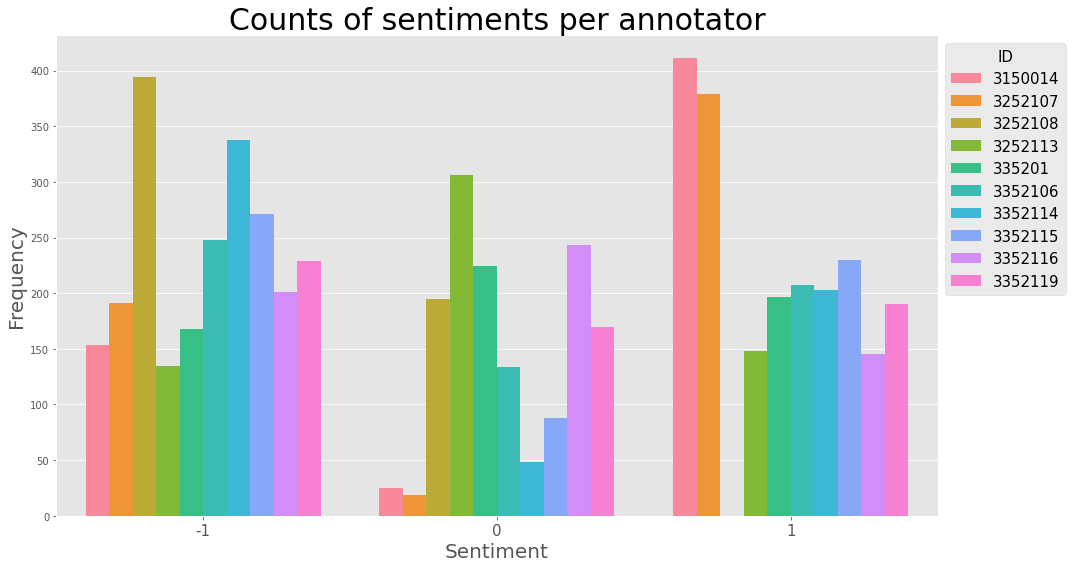

In [42]:
plt.figure(figsize=(15,8)) # create the figure with specific size
plt.style.use('ggplot')  # customize the style
sns.countplot(data=coders.reset_index(), x='polarity', hue="ID", saturation = 1) # countplot for polarity per ID
plt.legend(loc=2, bbox_to_anchor=(1,1),title="ID",fontsize=15).get_title().set_fontsize('15') # customize the legend
plt.xlabel("Sentiment", fontsize=20) # customize the x label
plt.ylabel("Frequency", fontsize=20) # customize the y label
plt.xticks(fontsize=15) # set font of the ID's at x axis
plt.title("Counts of sentiments per annotator", fontsize = 30) # customize the title of the plot
plt.tight_layout()
plt.show()

For putting the legend outside the box I used the "bbox_to_anchor" attribute, which I borroed it frmo this answer at stack overflow https://stackoverflow.com/a/4701285. This argument puts the legend in a place specified by the loc = 2 place of the plot.

The above plot displays the number of annotators having in their data each of the three values of sentiment. For -1 and 1 we have much more values than 0 sentiment. Also, for sentiment -1 we have increased variance, while for sentiment 1, 7 out of 10 annotators are close. For sentiment 0 we have also increased variability.

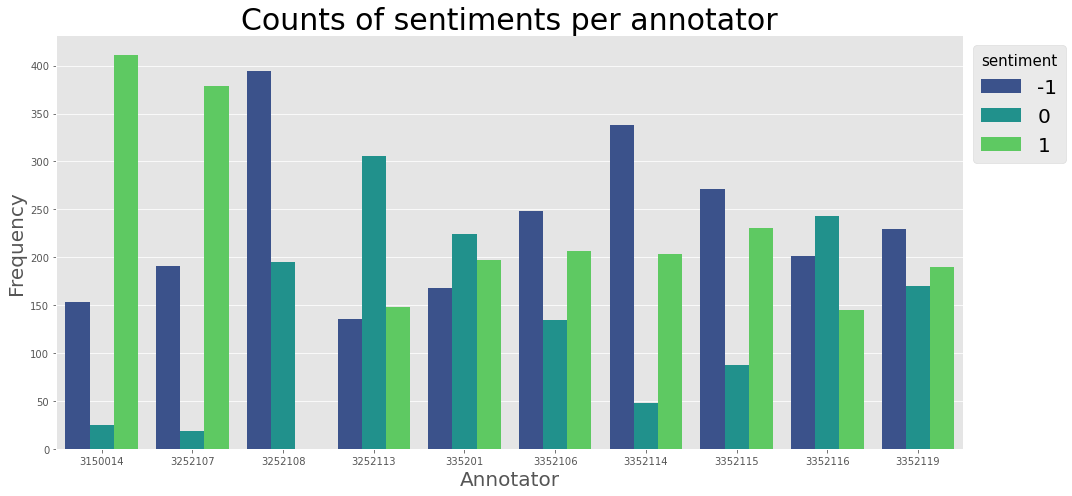

In [43]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
sns.countplot(data=coders.reset_index(), x='ID', hue="polarity", saturation = 1, palette="viridis")
plt.legend(loc=2, bbox_to_anchor=(1,1),title="sentiment",fontsize=20).get_title().set_fontsize('15')
plt.xlabel("Annotator", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=10) # set font of the ID's at x axis
plt.title("Counts of sentiments per annotator", fontsize = 30)
plt.tight_layout()
plt.show()

In this plot we display the same values with the previous plot but this time we have the annotators' ID at x axis and the sentiments in the legend. For the majority of the annotators we have increased variability in their sentiment polarity. Annotator `3352108` has not put any positive sentiment. Also, annotators `3252113` and `3352115` are the only that have more unclear sentiments than negatives and positives.

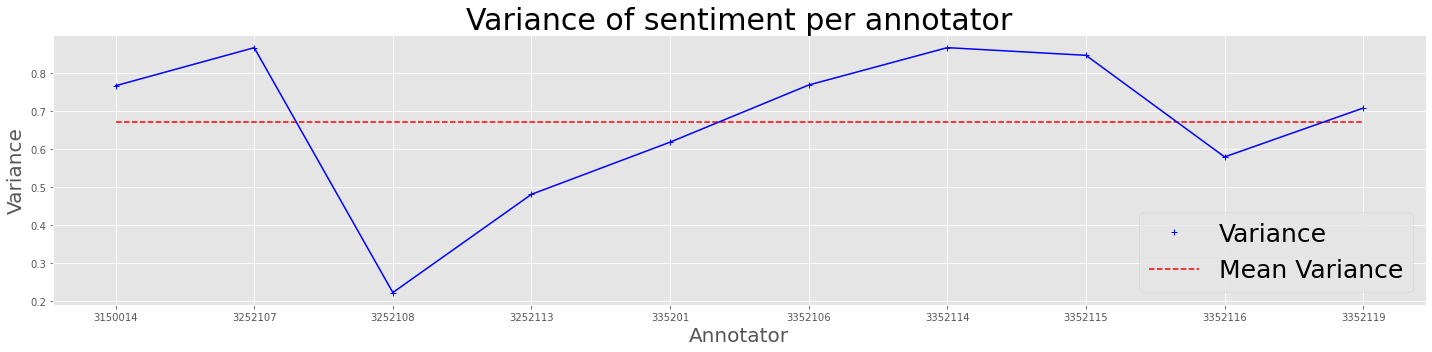

In [44]:
var_annot = [] # a list with the variances of the sentiment per annotator
for an in annot: # iterate through the annotators
    var = np.var(coders.loc[([an])].polarity) # calculate the variance of the sentiment for each annotator
    var_annot.append(var)
    
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.plot(annot, var_annot,"+", label='Variance',c='b')
plt.plot(annot, [np.mean(var_annot) for i in range(len(annot))], '--', label='Mean Variance', c='r')
plt.title("Variance of sentiment per annotator", fontsize=30)
plt.xlabel('Annotator', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.legend(loc="lower right", fontsize=25)
plt.plot(annot, var_annot,"-", label='Variance', c='b')
plt.tight_layout()
plt.show()

This plot displays the variances of the polarity column per each annotator. Annotator `3252108` seems to have the lower variance between his values of sentiment compared to the other annotators. The red dashed line shows the mean variance for all the annotators, which is around 0.7. This value is large if we consider that our values of sentiment are only -1, 0, 1. Except `3252108`, all the others have a value of variance around the mean, with the variability of `3252107`, `3352114` and `3352115` being significant increased compared to the mean.   

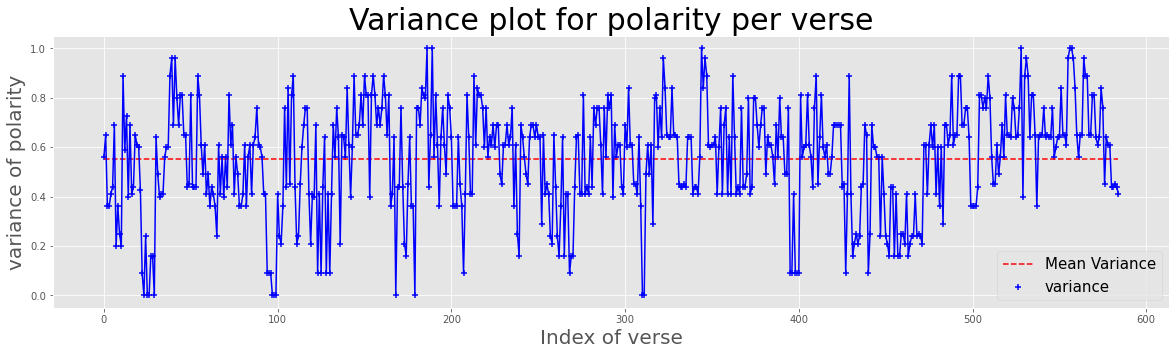

In [45]:
var_verse = [] # keep the variances of sentiment per verse
for verse in coders.reset_index().verse.unique(): # iterate through the uniwue verses
    var = np.var(coders.loc[pd.IndexSlice[:,verse],:].polarity) 
    var_verse.append(var)
    
plt.figure(figsize=(20,5))
plt.scatter([i for i in range(len(var_verse))], var_verse, marker='+', c='b', label='variance')
plt.plot([i for i in range(len(var_verse))], [np.mean(var_verse) for i in range(len(var_verse))], '--', label='Mean Variance', c='r')
plt.title("Variance plot for polarity per verse", fontsize=30)
plt.xlabel('Index of verse', fontsize = 20)
plt.ylabel('variance of polarity', fontsize=20)
plt.legend(loc='lower right', fontsize=15)
plt.plot([i for i in range(len(var_verse))], var_verse, '-', c='b')
plt.show()

This plot displays the variance of sentiment annotation per each verse. We see that the variances spread from 0 to 1. Also, the mean variance is between 0.5 and 0.6, with all the individual values being randomly around this mean. We do not have any pattern of the variance of the sentiments across the verses.

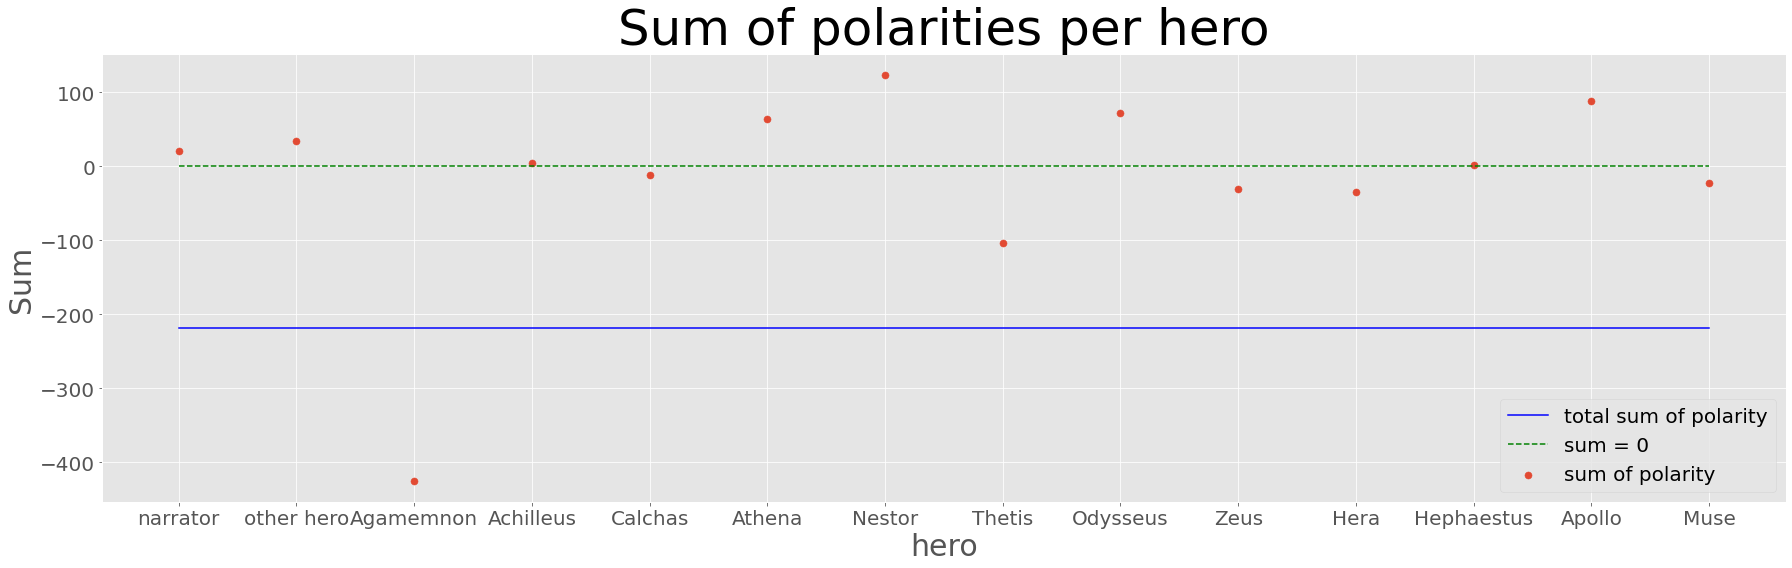

In [46]:
heros_pol = [] # keep the sum of polarity values per hero
for heros in coders.hero.unique(): # iterate through the unique hero names
    heros_pol.append(coders[coders.hero == heros].polarity.sum())
    
plt.figure(figsize=(25,8))
plt.style.use('ggplot')
plt.scatter(coders.hero.unique(), heros_pol, label = 'sum of polarity', s=50)
plt.plot(coders.hero.unique(), [coders.polarity.sum() for i in coders.hero.unique()], c='b',label="total sum of polarity")
plt.plot(coders.hero.unique(), [0 for i in coders.hero.unique()], '--', c='g', label="sum = 0")
plt.title("Sum of polarities per hero", fontsize=50)
plt.xlabel('hero', fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel('Sum', fontsize=30)
plt.yticks(fontsize=20)
plt.legend(loc='lower right', fontsize=20)
plt.tight_layout()
plt.show()

In the above graph we display the sum of sentiment values per each hero. We see that whenever Agamemnom speaks the sentiment tends to be negative. For all other heros the sentiments spread around the 0 value, meaning the number of negative and positive sentiments are close with each other. Maybe for Thetis tends to be a little more negative and for Nestor tends to be more positive. 

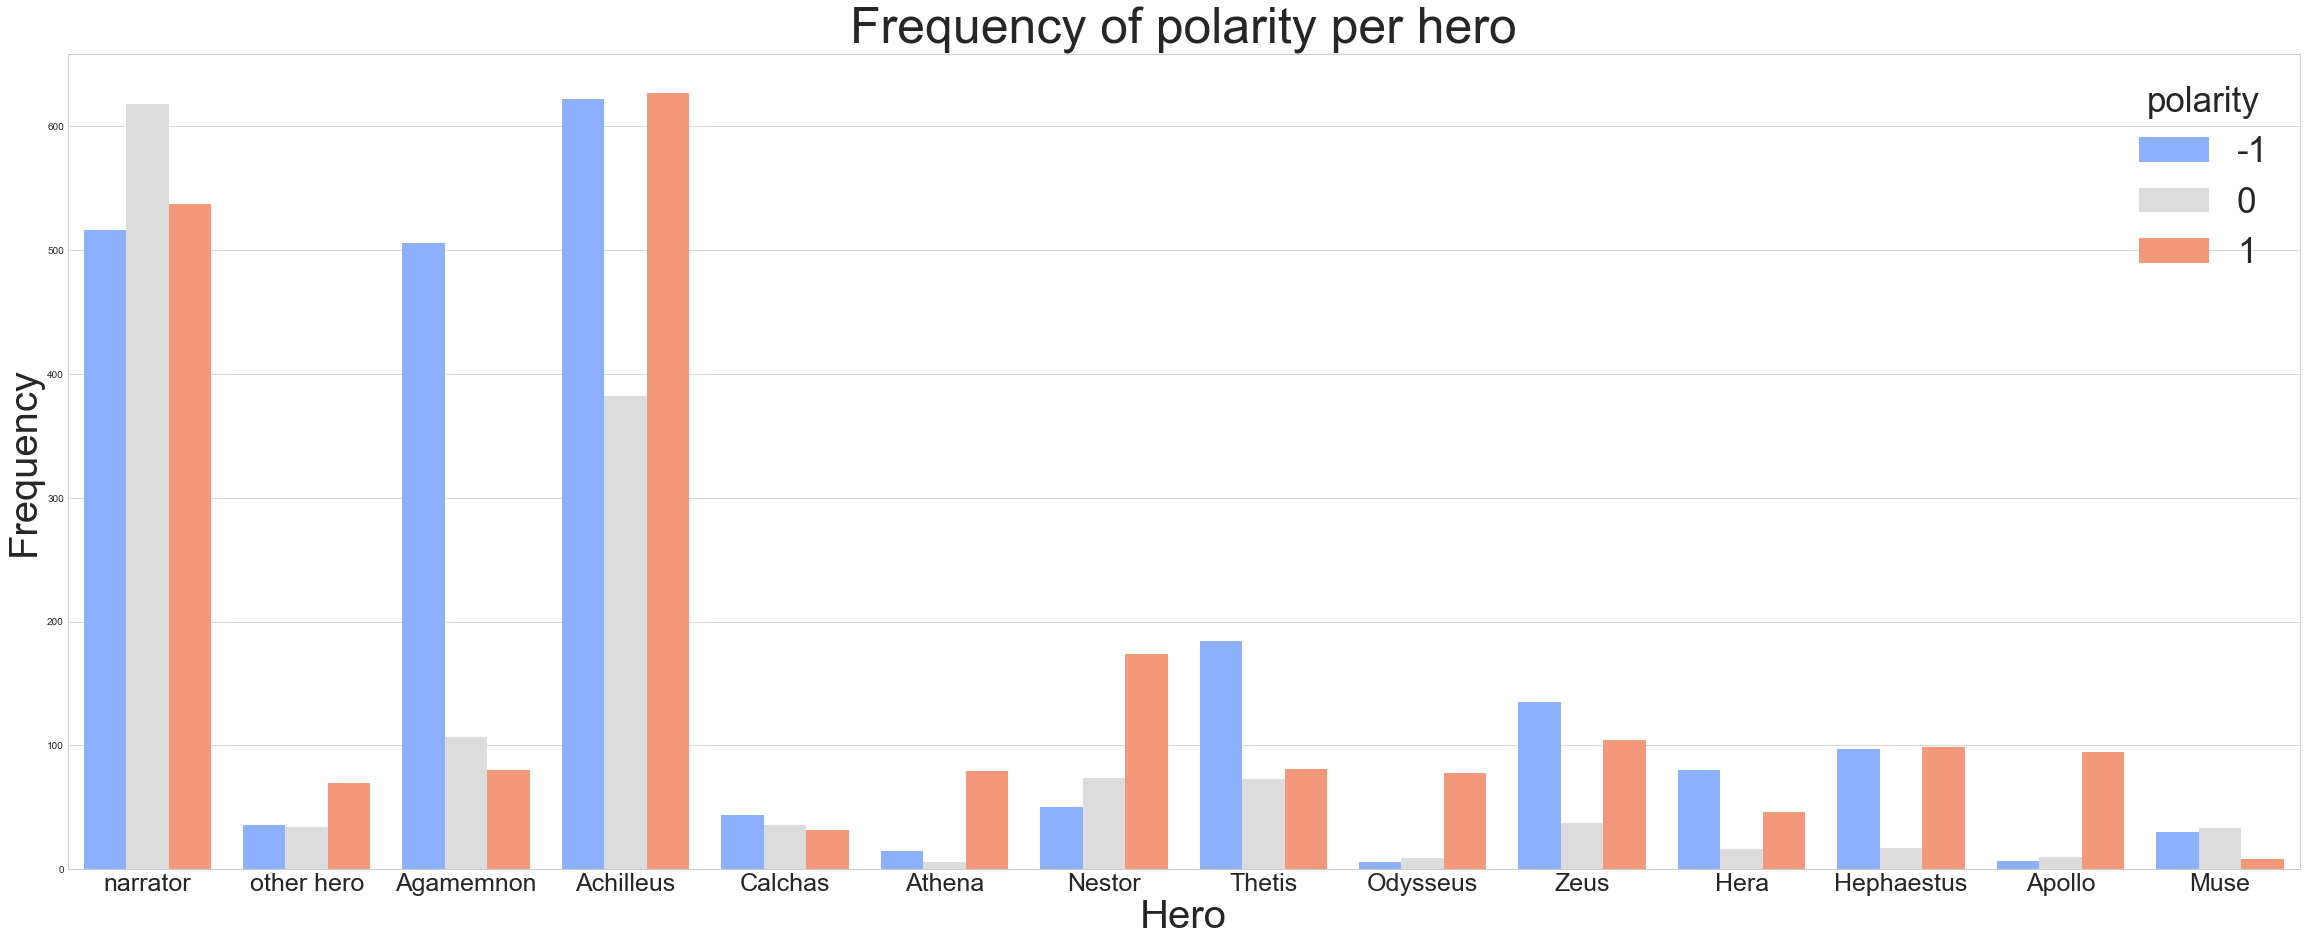

In [47]:
plt.figure(figsize=(40,15))
plt.style.use('seaborn-whitegrid')
sns.countplot(data=coders.reset_index(), x='hero', hue="polarity", saturation=1, palette='coolwarm')
plt.legend(loc='upper right', title="polarity",fontsize=35).get_title().set_fontsize('35')
plt.xlabel("Hero", fontsize=40)
plt.ylabel("Frequency", fontsize=40)
plt.xticks(fontsize=25) # set font of the ID's at x axis
plt.title("Frequency of polarity per hero", fontsize = 50)
plt.show()

This barplot displays the same thing with the previous scatter plot but in a different way. Here we show the number of each sentiment per each hero. However the findings will be similar. We se once again that for Agamemnom we have much more negative sentiment than the other two sentiments. For the narrator the dominant sentiment is the neutral, while for the magority of heros the neutral sentiment hav the smaller frequency and the other two sentiments have similar frequency.

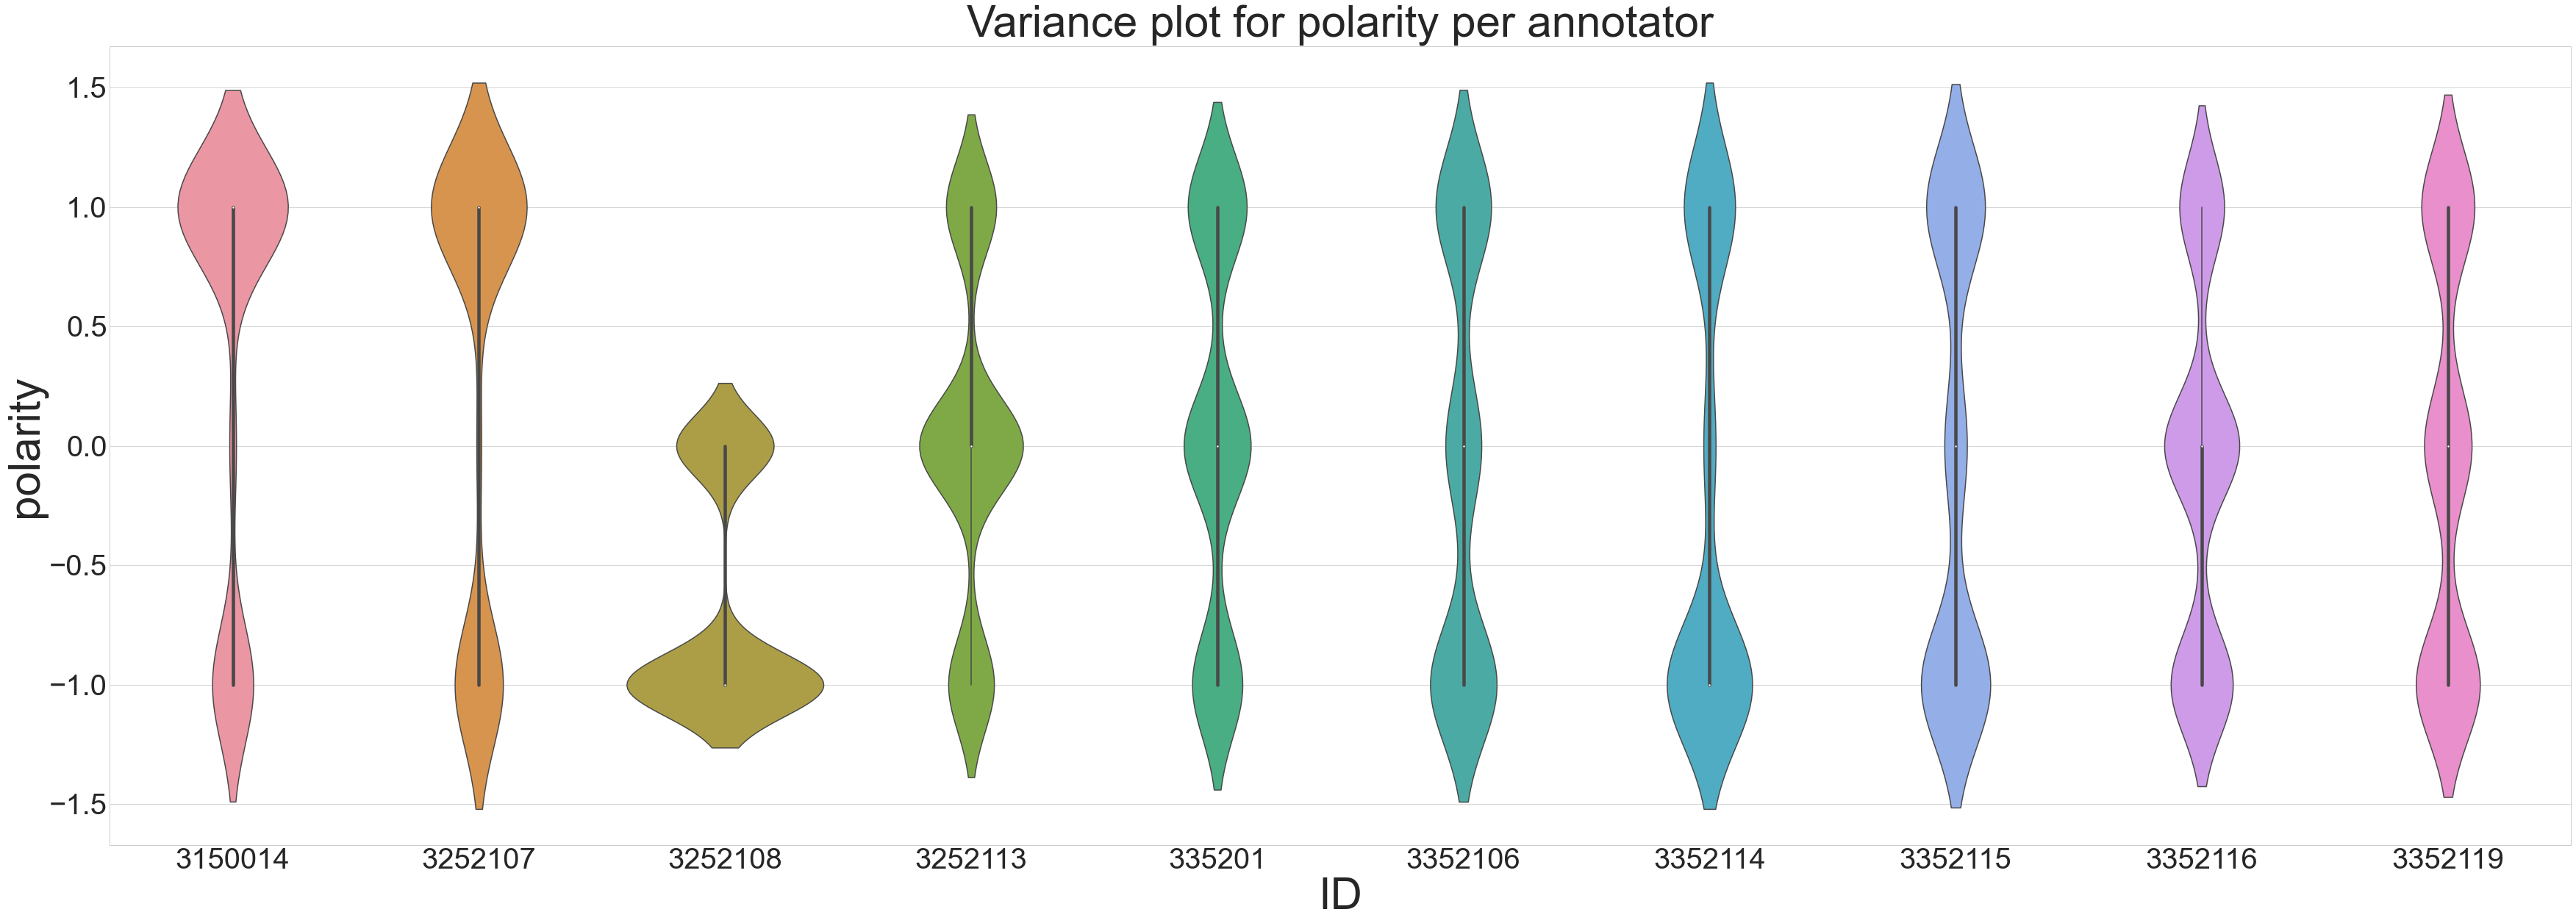

In [48]:
plt.figure(figsize=(60,20))
sns.violinplot(data=coders.reset_index(), x='ID', y='polarity')
plt.title('Variance plot for polarity per annotator', fontsize=60)
plt.xlabel('ID', fontsize=60)
plt.xticks(fontsize=40)
plt.ylabel('polarity', fontsize=60)
plt.yticks(fontsize=40)
plt.show()

This plot is a violin plot at is very useful for plotting the full distribution of a variable. Around the values with high frequency the violin is larger, while at the values with lower frequency the violin is smaller. We arise to the same colcusions as before. For annotator `3252108` the sentiments are mostly negative and we have some neutrals. For the majority of the other annotators the sentiments are equally distributied between negative and positive, with the neutral sentiments values change over the annotators. For the first two annotators only we have much more positive sentiments than negative ones.

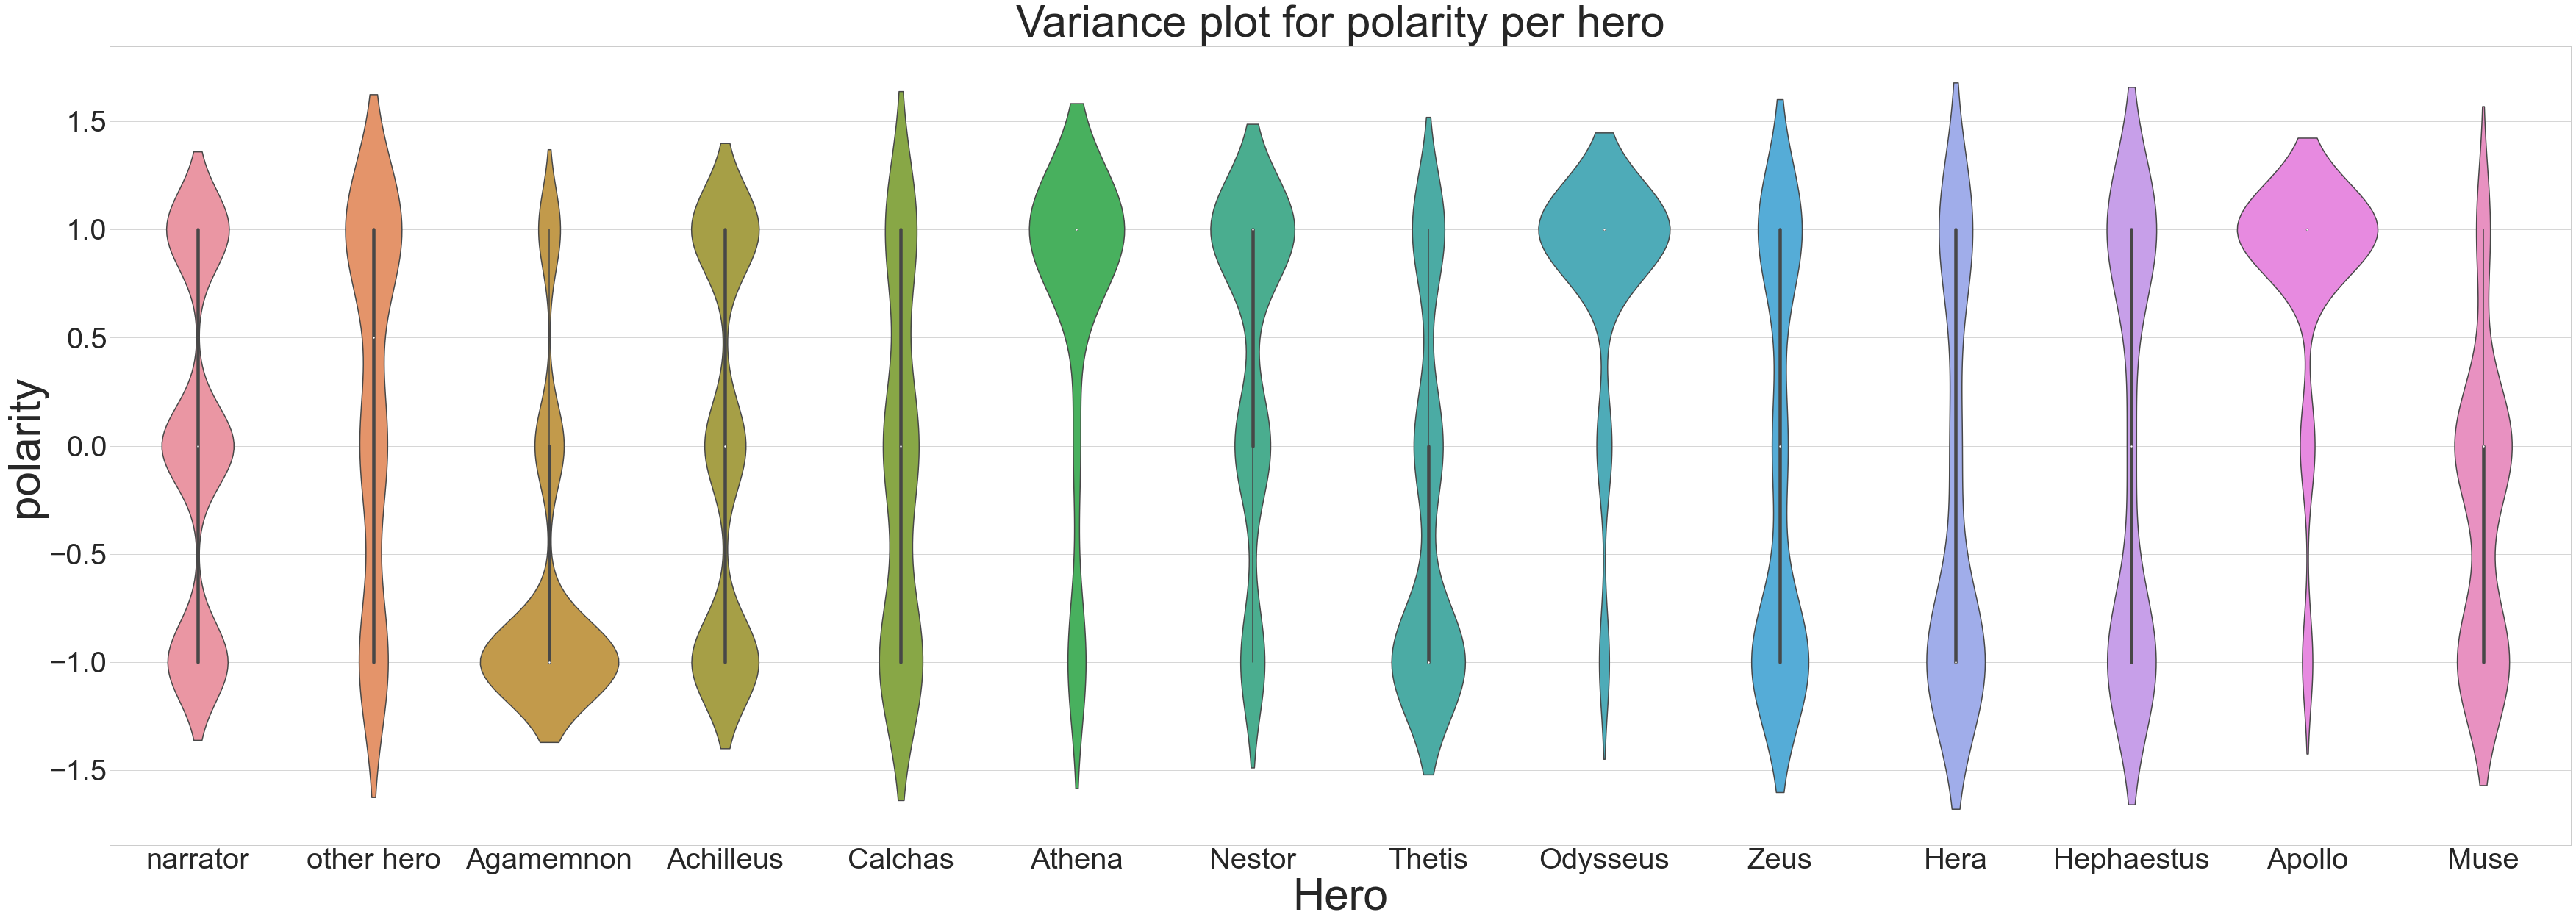

In [49]:
plt.figure(figsize=(60,20))
sns.violinplot(data=coders.reset_index(), x='hero', y='polarity')
plt.title('Variance plot for polarity per hero', fontsize=60)
plt.xlabel('Hero', fontsize=60)
plt.xticks(fontsize=40)
plt.ylabel('polarity', fontsize=60)
plt.yticks(fontsize=40)
plt.show()

We use the same method to diplay the full distribution of sentiment polarity per each hero.  We see that of Agamemnom, as we have mentioned before, the majority of sentiments are negative. On the other hand, for Athena, Odysseus and Apollo the sentiments are mostly positive. For all other annotators the polarity is spreading equally around the 0 value.

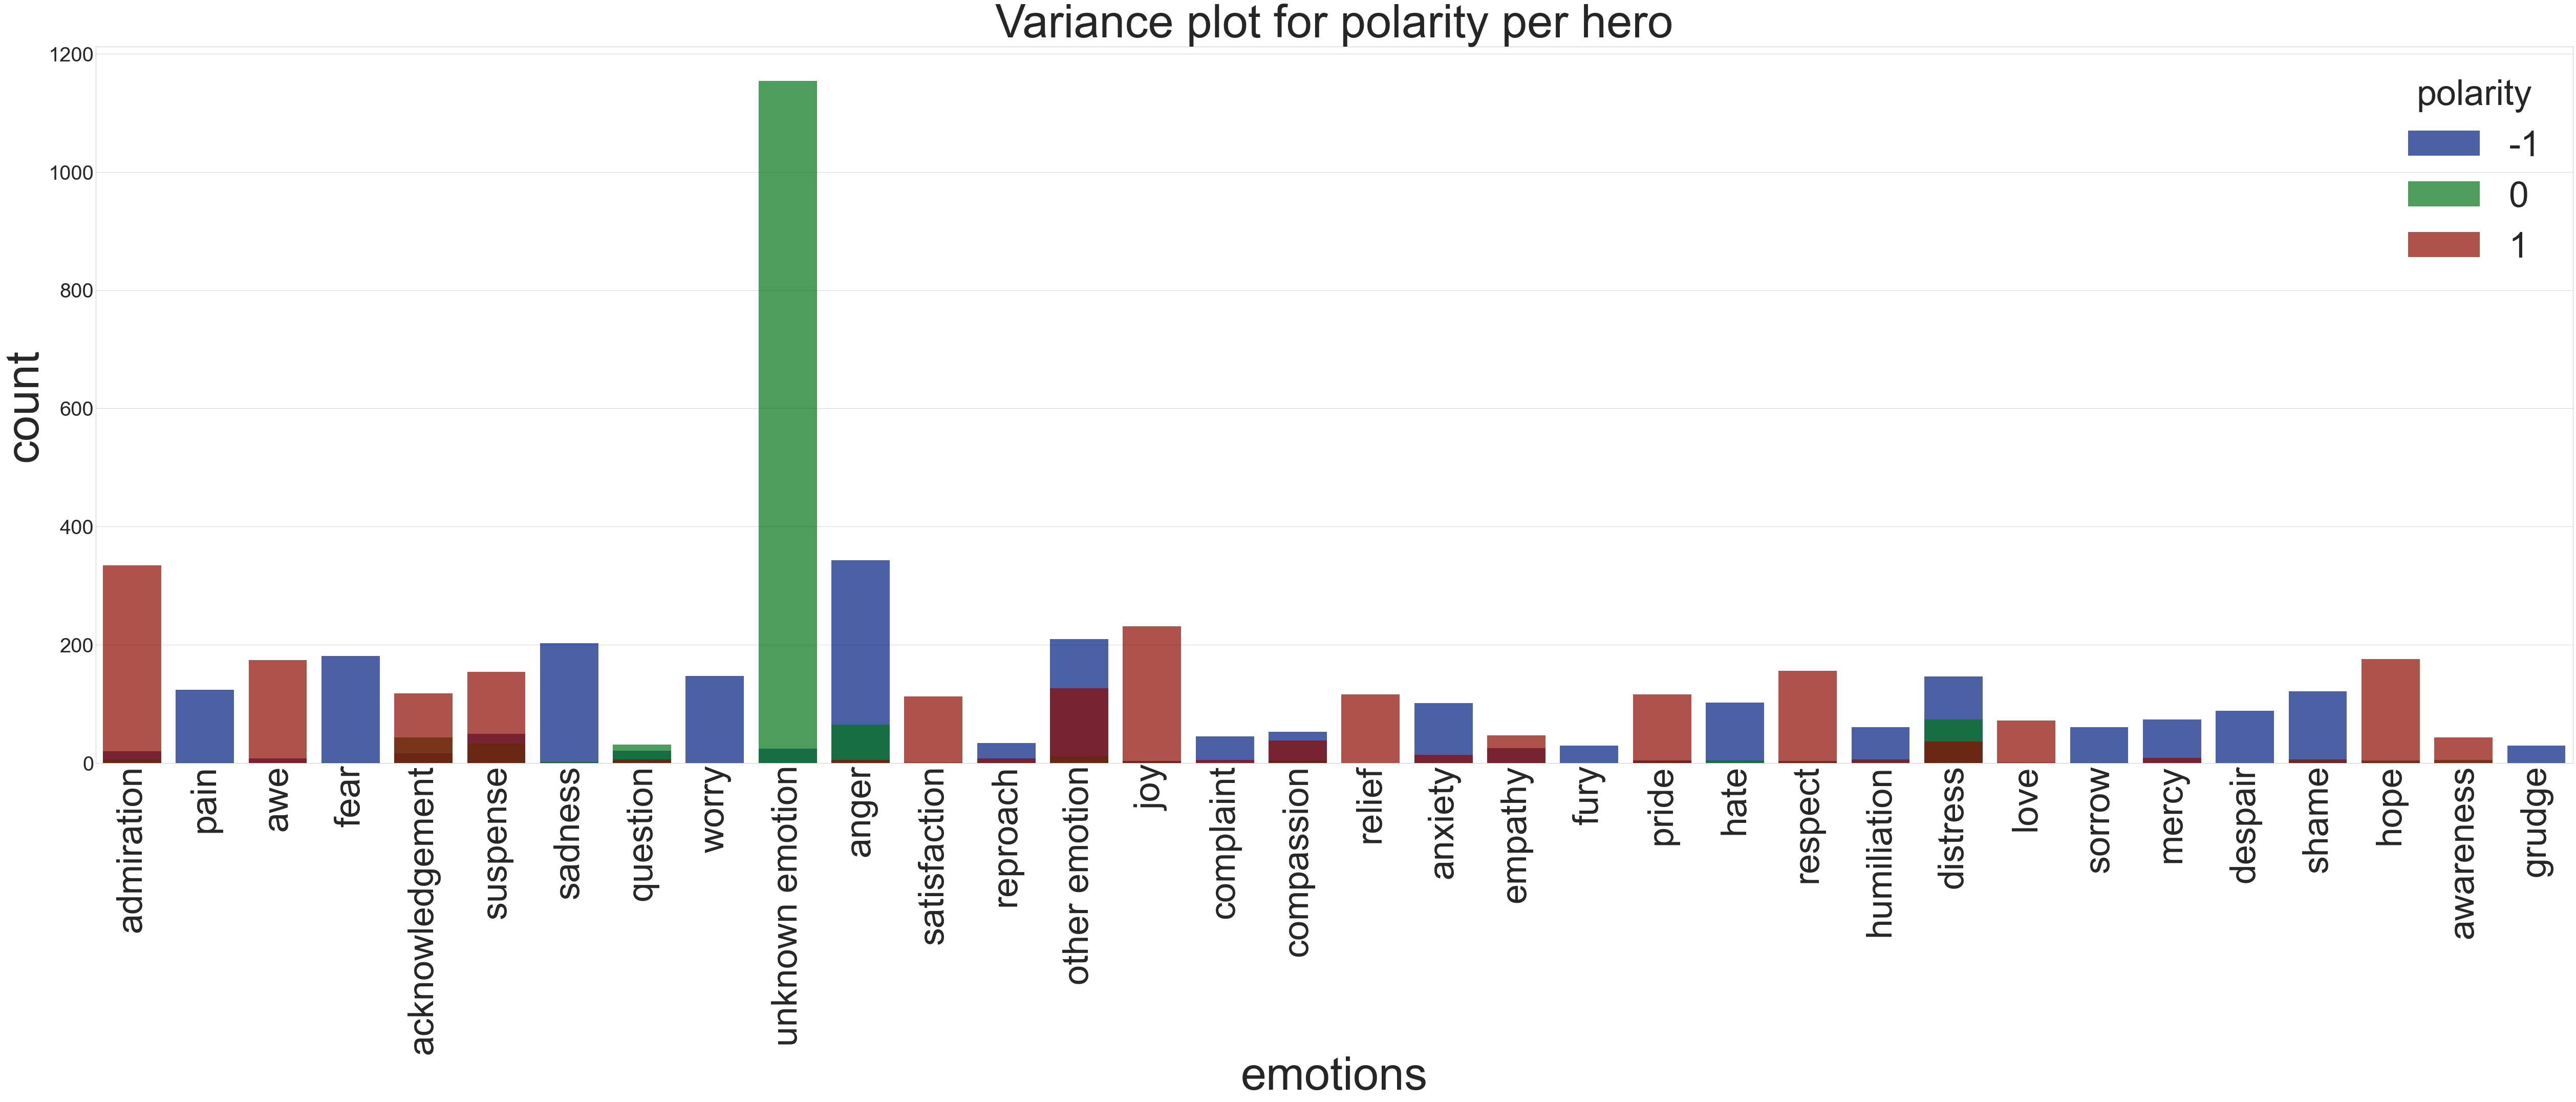

In [50]:
plt.figure(figsize=(70,30))
plt.style.use('seaborn-dark-palette')
sns.countplot(data=coders.reset_index(), x='emotions', hue='polarity', saturation = 2, dodge=False, alpha=0.7)
plt.title('Variance plot for polarity per hero', fontsize=90)
plt.xlabel('emotions', fontsize=90)
plt.xticks(fontsize=70, rotation=90)
plt.ylabel('count', fontsize=90)
plt.yticks(fontsize=40)
plt.legend(title='polarity', fontsize=70).get_title().set_fontsize(70)
plt.tight_layout()
plt.show()

This final graph displays the frequency of the polarity of sentiments for each emotion. For each emotion we have three bars, the one in the same place with the others. We can conclude that for unknown emotion the polarity is 0, which is natural. Also, for "positive" emotions like admiration, joy, pride and respect the sentiment is mostly +1, while for "negative" emotions like pain, fear, sadness and worry the sentiments are -1. There are som emotions that have both sentiment polarity even though there are objectively positive ot negative emotions like distress or compassion.

To conclude we have the three important findings below:
* The annotator `3252108` have not put any positive sentiment, and the majority of his sentiments is -1. This may be some how problematic for our analysis above.
* Whenever Agamemnom speaks the sentiments of readers tend to be more negative, compared to the other heros, while whenever Odysseus speaks the sentiments are leaned towards the positive side.
* The variability of sentiments per annotator and per verse is increased, indicating that reading the Iliad provokes both positive and negative emotions.


### 3. Automated annotation.
 * Build baselines (at least one based on random guesses) and regressors (at least three sklearn-based) that will yield a score (from -1 to 1) estimating the reader's sentiment for an unseen verse. 
 * Evaluate your models using mean absolute error (MAE) and mean square error (MSE). Turn the gold and predicted scores to classes (-1, 0, 1) and evaluate also using *proper* classification evaluation metrics.  
 * Diagnose and analyse any under/over fitting. 
 * Announce a winner based on your evaluation and apply it in order to predict a label (not score) per verse on the 24th Iliad book that is given. Submit your predictions as a compressed CSV with the following title: `IB24.your-student-ID-number.csv.gz`, where `your-student-ID-number` will hold your student ID number). The submitted dataframe should comprise the verses in one column (exactly as the original), but it should also comprise another column to hold the aligned predictions. 

 ---

In [51]:
# T3

# import all the packages we will need for the models

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression as lr, Ridge, Lasso
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
#! pip install xgboost
import xgboost as xgb


In [52]:
# import a stopwords dictionary
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
stopwords.words('greek') # display the greek stopwords

['αλλα',
 'αν',
 'αντι',
 'απο',
 'αυτα',
 'αυτεσ',
 'αυτη',
 'αυτο',
 'αυτοι',
 'αυτοσ',
 'αυτουσ',
 'αυτων',
 'αἱ',
 'αἳ',
 'αἵ',
 'αὐτόσ',
 'αὐτὸς',
 'αὖ',
 'γάρ',
 'γα',
 'γα^',
 'γε',
 'για',
 'γοῦν',
 'γὰρ',
 "δ'",
 'δέ',
 'δή',
 'δαί',
 'δαίσ',
 'δαὶ',
 'δαὶς',
 'δε',
 'δεν',
 "δι'",
 'διά',
 'διὰ',
 'δὲ',
 'δὴ',
 'δ’',
 'εαν',
 'ειμαι',
 'ειμαστε',
 'ειναι',
 'εισαι',
 'ειστε',
 'εκεινα',
 'εκεινεσ',
 'εκεινη',
 'εκεινο',
 'εκεινοι',
 'εκεινοσ',
 'εκεινουσ',
 'εκεινων',
 'ενω',
 'επ',
 'επι',
 'εἰ',
 'εἰμί',
 'εἰμὶ',
 'εἰς',
 'εἰσ',
 'εἴ',
 'εἴμι',
 'εἴτε',
 'η',
 'θα',
 'ισωσ',
 'κ',
 'καί',
 'καίτοι',
 'καθ',
 'και',
 'κατ',
 'κατά',
 'κατα',
 'κατὰ',
 'καὶ',
 'κι',
 'κἀν',
 'κἂν',
 'μέν',
 'μή',
 'μήτε',
 'μα',
 'με',
 'μεθ',
 'μετ',
 'μετά',
 'μετα',
 'μετὰ',
 'μη',
 'μην',
 'μἐν',
 'μὲν',
 'μὴ',
 'μὴν',
 'να',
 'ο',
 'οι',
 'ομωσ',
 'οπωσ',
 'οσο',
 'οτι',
 'οἱ',
 'οἳ',
 'οἷς',
 'οὐ',
 'οὐδ',
 'οὐδέ',
 'οὐδείσ',
 'οὐδεὶς',
 'οὐδὲ',
 'οὐδὲν',
 'οὐκ',
 'οὐχ',
 'οὐχὶ',
 'οὓς'

In order to fit our regression models we need a ground truth arising from our data. One logical choice for the ground truth is to obtain the mean sentiment polarity for each verse across the annotators. With this way we have map the polarities to the continuous interval `[-1,1]` and it is more convient to fit regression model. Otherwise we would have to fit classification models.

First we will need to keep a dataframe with the sentiments and with mean sentiment per verse.

In [56]:
#  create a data frame with all the sentiments per annotator with the mean sentiment, which will be used as ground truth
gold = pd.DataFrame(data= {'verse' : coders.reset_index()[:589].verse})
for i in range(len(annot)):
    gold[annot[i]] = coders.loc[annot[i]].reset_index().polarity   

gold["mean_polarity"] = gold.mean(axis=1)
gold

verse  3150014  3252107  \
0    Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...        1        1   
1    ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...       -1        1   
2    και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...       -1        1   
3    παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...       -1        1   
4    και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...        0        1   
..                                                 ...      ...      ...   
584  κει που 'χε χτίσει στον καθένα τους παλάτι ο κ...        1        0   
585  ο ξακουστός τεχνίτης Ήφαιστος, με τη σοφή του ...        1        0   
586  Κι ο Δίας ο Ολύμπιος, ό αστραπόχαρος, στην κλί...        1        1   
587  εκεί που ως τώρα πάντα, ως του 'ρχονταν ύπνος ...        1        1   
588  κει πάνω ανέβη, κι η χρυσόθρονη σιμά του επλάγ...        1        1   

     3252108  3252113  335201  3352106  3352114  3352115  3352116  3352119  \
0         -1        0       0        0       -1        1        0        1   
1         -1       -1      -1       -1       -1        1        0       -1   
2         -1       -1      -1       -1       -1       -1       -1       -1   
3         -1       -1      -1       -1       -1       -1       -1       -1   
4         -1        0      -1       -1        0        0       -1        0   
..       ...      ...     ...      ...      ...      ...      ...      ...   
584       -1        0       1        1        0        1        0        1   
585       -1        1       1        1        1        1        0        1   
586       -1        0       1        1        0        1        0        1   
587       -1        0       1        1        1        1        0        1   
588       -1        1       1        1        1        1        0        1   

     mean_polarity  
0              0.2  
1             -0.5  
2             -0.8  
3             -0.8  
4             -0.3  
..             ...  
584            0.4  
585            0.6  
586            0.5  
587            0.6  
588            0.7  

[589 rows x 12 columns]

In [57]:
gold.mean_polarity.value_counts()

-0.3    58
 0.0    49
 0.1    47
 0.3    45
 0.2    44
-0.2    42
-0.4    42
-0.1    35
 0.5    34
-0.5    26
-0.6    26
 0.4    24
 0.7    22
 0.6    21
-0.7    16
 0.8    16
-0.8    14
-0.9    13
-1.0    11
 0.9     4
Name: mean_polarity, dtype: int64

In [58]:
# split the gold data frame to train and test data frames with 70% train and 30% test
gold_train, gold_test = train_test_split(gold, random_state=10, test_size=0.3)

After we have create the ground truth and we have done the splitting, we need to build some baselines. These baselines will help us evaluate our models. We need to fit models that are better than the baselines in order to be able to say that our models are reasonable.

In [67]:
# build the baselines
from sklearn.dummy import DummyClassifier
clf_most_frequent = DummyClassifier(strategy = "most_frequent")
clf_most_frequent.fit(X_train, y_train)
baseline_frequent = clf_most_frequent.predict(X_test)

clf_uniform = DummyClassifier(strategy = "uniform")
clf_uniform.fit(X_train, y_train)
baseline_uniform = clf_uniform.predict(X_test)

# create a dictionary with all 5 baselines
baselines_dict = {'baseline most frequent': baseline_frequent,
                  'baseline uniform': baseline_uniform}

# create a data frame with the baselines
baselines = pd.DataFrame(baselines_dict)

baselines

baseline most frequent  baseline uniform
0                      -0.3               0.8
1                      -0.3               0.5
2                      -0.3              -0.8
3                      -0.3              -0.1
4                      -0.3               0.7
..                      ...               ...
172                    -0.3              -0.2
173                    -0.3               0.3
174                    -0.3              -0.9
175                    -0.3              -0.8
176                    -0.3              -0.7

[177 rows x 2 columns]

In [57]:
baselines_train, baselines_test = train_test_split(baselines, test_size =0.3, random_state=10)

for base in baselines_test.columns:
    print(f"The MSE for {base} is: {mean_squared_error(baselines_test[base], gold_test.mean_polarity)}")

The MSE for baseline random is: 0.6111942299160968
The MSE for baseline with zeros is: 0.2080225988700565
The MSE for baseline with ones is: 1.2441807909604519
The MSE for baseline with negative ones is: 1.171864406779661
The MSE for baseline with mode is: 0.28717514124293786


The model with all the predicted values equal to 0 is the best according to the MSE criteria across all the baselines. Also, the value of 0.20 indicated that if a model has a MSE very close to 0.20 there is high chance to be problematic.

In [59]:
stop_words = stopwords.words('greek') # create a list with words that will not be included

We want now to fit the regression models for the verses. Verses are string sentences. Thus, we need to vectorize these sentences and convert them in a more convient form for the models. So we put a large array in every sentence of the verses.

We first fit the transformation, meaning that we create a vocabulary based on the verses we have.

In [60]:
# call the vectorizer
vectorizer = TfidfVectorizer(min_df = 5, stop_words=stop_words)
X = vectorizer.fit_transform(gold.verse)
y = gold.mean_polarity # keep the mean sentiment as the target variable


C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['δι', 'ἀλλ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


We split X and y into train and test according to the split we have done in the data frame

In [61]:
# split X and y into train and test according to the splitting we did at gold data frame
X_train = vectorizer.transform(gold_train.verse)
y_train = gold_train.mean_polarity
X_test = vectorizer.transform(gold_test.verse)
y_test = gold_test.mean_polarity

Fit all the regression models with their parameters and display the MSE and MAE for both train and test set in order to see which models fits the data better and to diagnose any over or under fitting

In [68]:
# keep all the regression models I will use in a single list

models = [DummyClassifier(strategy = "most_frequent"), # dummy classifiers
          DummyClassifier(strategy = "uniform"),
          lr(), # linear regression model
          Ridge(alpha=0.1), # ridge regression model with λ=0.1
          Lasso(alpha=0.01, max_iter=10000), # lasso regression model with λ = 0.01
         DecisionTreeRegressor(random_state = 40, max_depth=10), # decision tree with max depth = 4
         xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.5, 
                          learning_rate = 0.15,
                          max_depth = 5, 
                          reg_lambda = 0.5, 
                          n_estimators = 100), # x gradient boosting regressor
         RandomForestRegressor(max_depth=10), # random forest regression with max depth = 4
         KNeighborsRegressor(n_neighbors=10) # knn regressor with 5 nearest neighbors
         ]

We fit all the above models to the train set and we evaluate them on the test set. We print 4 values for each model in order to see if they fit the data reasonably well and if there is any overfitting or underfitting.

In [79]:
str(models[1]).split('(')[0] + "_uniform"

'DummyClassifier_uniform'

In [85]:
# fit all the models and print the train and the test MSE and MAE
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    name_model = str(model).split('(')[0]
    if i == 0:
        print(f"For {name_model} (most_frequent):")
    elif i == 1:
        print(f"For {name_model} (uniform):")
    
    else:
        print(f"For {name_model}:")
        
    print(f"""
        the train MSE is: {mean_squared_error(pred_train, y_train)} 
        the test MSE is: {mean_squared_error(pred_test, y_test)}  
        the train MAE is: {mean_absolute_error(pred_train, y_train)} 
        the test MAE is: {mean_absolute_error(pred_test, y_test)}\n""")

For DummyClassifier (most_frequent):

        the train MSE is: 0.2614077669902913 
        the test MSE is: 0.28717514124293786  
        the train MAE is: 0.4121359223300971 
        the test MAE is: 0.43672316384180787

For DummyClassifier (uniform):

        the train MSE is: 0.5200242718446602 
        the test MSE is: 0.4984180790960452  
        the train MAE is: 0.5808252427184466 
        the test MAE is: 0.5604519774011298

For LinearRegression:

        the train MSE is: 0.12329544456918291 
        the test MSE is: 0.34567725165123636  
        the train MAE is: 0.2798359815633476 
        the test MAE is: 0.4611798053114062

For Ridge:

        the train MSE is: 0.12446416374666709 
        the test MSE is: 0.29468335547435515  
        the train MAE is: 0.28265363627097406 
        the test MAE is: 0.43900054150774354

For Lasso:

        the train MSE is: 0.19645701762654352 
        the test MSE is: 0.2084283424743835  
        the train MAE is: 0.36420256386087285 
   

Linear regression, Ridge regression, Decision tree and XGB regression overfit the data, as the MSE and MAE for the train set is extremely good, but the same values for the test set are not so good. So these models may be not generilise so well. On the other hand the other models does not seem to overfit the data but the MSE values for the test set are very close to 0.2, indicating that may be we have a problem as the MSE for the baseline with zeros was 0.2.

In order to see how our models perform to the classification task we will map the predicted and ground truth scores to the class -1, 0, 1. We split the scores to the values -0.33 and 0.33 because in this way each class has the same length of interval. However, we recall that in our data the no emotions where fewer that positive and negative emotions, so an other reasonable split will be perhaps 0.2 or 0.15, but in this way we will include bias in the model.

In [90]:
weight = 0.33
for j, model in enumerate(models):
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    pol_pred = np.zeros(len(pred_test))
    pol_gold = np.zeros(len(gold_test))
    for i in range(len(pred_test)):
        if pred_test[i] <= - weight: 
            pol_pred[i] = -1
        elif pred_test[i] >= weight: 
            pol_pred[i] = 1
        
        if gold_test.mean_polarity.iloc[i] <= - weight:
            pol_gold[i] = -1
        elif gold_test.mean_polarity.iloc[i] >= weight:
            pol_gold[i] = 1
    
    name_model = str(model).split('(')[0]
   
    if j == 0:
        print(f"Classification report for {name_model} (most_frequent):")
    elif j == 1:
        print(f"Classification report for {name_model} (uniform):")
    else:
        print(f"Classification report for {name_model}:")
        
    print(f"""
    {classification_report(pol_pred, pol_gold, zero_division=0)}\n""")

Classification report for DummyClassifier (most_frequent):

                  precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.51      0.67       177
         1.0       0.00      0.00      0.00         0

    accuracy                           0.51       177
   macro avg       0.33      0.17      0.22       177
weighted avg       1.00      0.51      0.67       177


Classification report for DummyClassifier (uniform):

                  precision    recall  f1-score   support

        -1.0       0.38      0.29      0.33        62
         0.0       0.48      0.57      0.52        75
         1.0       0.26      0.25      0.25        40

    accuracy                           0.40       177
   macro avg       0.37      0.37      0.37       177
weighted avg       0.39      0.40      0.39       177


Classification report for LinearRegression:

                  precision    recall  f1-score   support

        -1

For the print I used this answer in order to take only the name of the model without the parameters https://stackoverflow.com/a/62604589. I modify it a bit so as to split the name of the model to '(' and I kept only the first element which is what I wanted.

We see that in the models that we have not diagnose any overfitting, the classification sends all the labels to 0. In constrast, in models that we have large overfitting like the linear regression and the xgb regression, the model does not predict only zeros. Hence, we have a trade off between overfit and underfit. Between these two options I tend to prefer the models with more overfit, because in order to have a good generilization I do not want to predict only zeros.  

Having these in mind I choose the XGB regressor as it has a relatively good MSE and MAE for the test set and at the same time has labels other than 0 with not losing at accuracy compared to the other models.

In [91]:
# we keep the xgb regression model as our best performing model
best_model = models[6]
best_model.fit(X,y)
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

We read the excel file with the translation of the 24th book of Iliad.

In [92]:
for file in os.listdir():  # loop over the files in the folder IB1-annotated which is in the folder that we work
    if file == "I24.xlsx":  # we need only the excel files
        I24 = pd.read_excel(file)
    

In [93]:
I24

verse
0    Λύθηκε η σύναξη· στα γρήγορα καράβια του τ᾿ ασ...
1    πίσω γυρνάει σκορπώντας, κι όλοι τους το δείπν...
2    και το γλυκό τον ύπνο εγνοιάζουνταν. Μόνο ο Αχ...
3    το σύντροφο του αναθυμάμενος, κι ουδέ καθόλου ...
4    ο παντοδαμαστής τον έπιανε, μον᾿ γύρναε δώθε κ...
..                                                 ...
825  μην τύχει πριν και πέσουν πάνω τους οι Αργίτες...
826  Κι ως πια ψηλά το χώμα εσώρωσαν, γυρνούν και φ...
827  μετά σε πλούσιες τάβλες έτρωγαν, με τάξη συναγ...
828  μέσα στου Πριάμου, του τρισεύγενου ρηγάρχη, το...
829    Έτσι τον έθαψαν τον Έχτορα, το γαύρο αλογομάχο.

[830 rows x 1 columns]

Now we predict the sentiment polarity for this unknown book.

In [94]:
weight = 0.3
predictions_new = best_model.predict(vectorizer.transform(I24.verse))
pol_pred = np.zeros(len(predictions_new)).astype(str)
for i in range(len(predictions_new)):
    if predictions_new[i] <= - weight:
        pol_pred[i] = 'negative'
    elif predictions_new[i] >= weight:
        pol_pred[i] = 'positive'
    else:
        pol_pred[i] = 'no emotion'
        
pol_pred = pol_pred.astype(str)
I24["predicted_polarity"] = pol_pred

In [95]:
I24.predicted_polarity.value_counts()

no emotion    723
negative       61
positive       46
Name: predicted_polarity, dtype: int64

In [96]:
I24.sample(10)

verse predicted_polarity
385  που τέτοιο συνεβγάλτη μου 'πεψε να βγει μπροστ...         no emotion
441  Μον᾿ έλα, τούτη την πανέμορφη δέξου από μένα κ...         no emotion
604  θα τον εσκότωνε, το θέλημα του Δία πατώντας έτσι.           negative
718  κεντούσαν το νεκρό τον έσερναν οι μούλες, και ...         no emotion
18   στον κουρνιαχτό απλωτό τ᾿ απίστομα. Μα το κορμ...         no emotion
630                                  ένας δε βρισκόταν         no emotion
155  Μηδέ να βάλει ο νους του θάνατο, να μη σκιαχτε...         no emotion
693  πα στον αρμό, καμιά στα σπλάχνα του μην έχει π...         no emotion
351  τον φέρναν πάνω απ᾿ τις απέραντες στεριές και ...         no emotion
433  που τόσες στο κορμί του ρίχνοντας με το χαλκό ...         no emotion

In [97]:
I24.to_csv('IB24-f3352101.csv.gz', sep=',') # write the data frame to a csv file


### 4. Scraping and silver labeling.
 * Scrape all the books of Iliad, by using this [translation from Project Gutenberg](https://www.gutenberg.org/cache/epub/36248/pg36248-images.html).
 * Use your best performing sentiment classifier from (3) to label the verses of all the 24 crawled books (silver labeling).  
 * Visualise the sentiment series resulted from the silver labels of all the books. 
 * Evaluate your model's predictions for the 1st scraped book with the respective gold annotations (of the same book from T3, yet with a different translation), which you used to train your model.

We scrap all the books of Iliad from the link given.

In [98]:
# T4

from bs4 import BeautifulSoup
import requests
import pprint
r = requests.get("https://www.gutenberg.org/cache/epub/36248/pg36248-images.html")
html = r.content
soup = BeautifulSoup(html, 'html.parser') # create a soup
print(soup.prettify()) # see the content of the html file
        

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="HTML Tidy for HTML5 for Linux version 5.6.0" name="generator"/>
  <meta content="Όμηρος, Αλέξανδρος Πάλλης, Λέκας Αρβανίτης Μαλιαρός, Ιλιάδα" name="keywords"/>
  <title>
   Ιλιάδα
  </title>
  <style>
   /**/
span.c4 {
    font-size: 150%
    }
h4.c3 {
    margin-top: 3em
    }
h1.c2 {
    margin-top: 2em
    }
h2.c1 {
    margin-top: 2em
    }
/**/
  </style>
  <link href="http://purl.org/dc/elements/1.1/" rel="schema.dc"/>
  <link href="http://purl.org/dc/terms/" rel="schema.dcterms"/>
  <meta content="Ιλιάδα" name="dc.title"/>
  <meta content="el" name="dc.language"/>
  <meta content="https://www.gutenberg.org/files/36248/36248-h/36248-h.htm" name="dcterms.source"/>
  <meta content="2022-03-16T11:52:58.964404+00:00" name="dcterms.modified"/>
  <meta content="Public domain in the USA." name="dc.rights"/>
  <link href="http://www.gutenberg.org/ebooks/36248" rel="dcterms.isFormatOf"/>
  <meta content="Homer, 750?

We see that all the senteces we want are in the "td" in the html. Also, the titles of the rapsodies are in the "span: class:c4". We need those titles in order to split the verses according to the rapsodies (books).

In [99]:
review_titles_list = soup.find_all("td") # find all the sentences included in the "td"

raps_titles = [] # initialize the titles of books
d = [] # keep a temporary list for all the Iliad

# keep the titles of books
for titles in soup.find_all("span", {'class':'c4'}):
    raps_titles.append(titles.get_text())

# read all the translation and keep only the sentences larger than 3 characters because we have a lot of dots and numbers 
# and we do not have verses smaller than 4 words length
for review_title in review_titles_list:
    #if review_title.get_text() == raps_titles[i]:
    if review_title.get_text() not in raps_titles:
        if len(review_title.get_text())>3:
            d.append(review_title.get_text())
            
    else:
      
        d.append(review_title.get_text())
            
data = {} # create a dictionary with our books

for j in range(len(raps_titles)):
    if j < len(raps_titles) -1:
        data[raps_titles[j]] = d[d.index(raps_titles[j])+1:d.index(raps_titles[j+1])]
        j += d.index(raps_titles[j]) 
    else:
        data[raps_titles[j]] = d[d.index(raps_titles[j])+1:]

In [100]:
data

{'Α': ['Μούσα, τραγούδα το θυμό του ξακουστού Αχιλέα,',
  "τον έρμο! π' όλους πότισε τους Αχαιούς φαρμάκια,",
  'και πλήθος έστειλε ψυχές λεβέντικες στον Άδη',
  "οπλαρχηγώνε, κι' έθρεψε με τα κορμιά τους σκύλους",
  "κι' όλα τα όρνια (του Διός έτσι είχε η γνώμη ορίσει),",
  "απ' την αρχή σαν πιάστηκε με το γοργό Αχιλλέα",
  "τ' Ατρέα ο πρωταφέντης γιος και χώρισαν οι διο τους.",
  'Πιος τάχα λες τους έβαλε θεός να λογοφέρουν;',
  'Του Δία ο γιος και της Λητός, που με τον Αγαμέμνο',
  "θύμωσε κι' έρηξε κακή μες στο στρατό πανούκλα,",
  'και κόσμος πέθαινε, γιατί στο λειτουργό το Χρύσα',
  "δε θέλησε τ' Ατρέα ο γιος λίγη σπλαχνιά να δείξει.",
  'Γιατί ήρθε αφτός στα γλήγορα των Αχαιών καράβια',
  'να λευτερώσει θέλοντας την κόρη του, και πλούσια',
  'είχε μαζί του ξαγορά, και κράταε στα διο χέρια',
  "πάς στο χρυσόφτιαστο ραβδί, τ' Απόλλου τα στεφάνια,",
  "κι' όλους τους άλλους Αχαιούς θερμοπερικαλούσε,",
  "μα τα πρωτάτα πιο πολύ, τους διο τους γιους τ' Ατρέα",
  "«Τ' Ατρέα οι γιοί κι

In [101]:
# stack the books in a data frame, each row is a book.
columns = ['verse_' +str(i) for i in range(1,957)] 
iliada = pd.DataFrame.from_dict(data, orient='index', columns = columns)
iliada = iliada.transpose() # transpose the data frame to have the books as columns
iliada

Α  \
verse_1        Μούσα, τραγούδα το θυμό του ξακουστού Αχιλέα,   
verse_2     τον έρμο! π' όλους πότισε τους Αχαιούς φαρμάκια,   
verse_3         και πλήθος έστειλε ψυχές λεβέντικες στον Άδη   
verse_4    οπλαρχηγώνε, κι' έθρεψε με τα κορμιά τους σκύλους   
verse_5    κι' όλα τα όρνια (του Διός έτσι είχε η γνώμη ο...   
...                                                      ...   
verse_952                                               None   
verse_953                                               None   
verse_954                                               None   
verse_955                                               None   
verse_956                                               None   

                                                           Β  \
verse_1    Κι' οι άλλοι αθρώποι και θεοί κοιμούντανε όλη ...   
verse_2    μα ο Δίας δεν τη χαίρουνταν του ύπνου τη γλυκάδα,   
verse_3       Μον μες στο νου του ανάδεβε το πώς στον Αχιλέα   
verse_4    δόξα να δώκει, και πολλούς να σφάξει στα καράβια.   
verse_5    Κι' αφτή η βουλή τού φάνηκε σαν πιο καλή στο ν...   
...                                                      ...   
verse_952                                               None   
verse_953                                               None   
verse_954                                               None   
verse_955                                               None   
verse_956                                               None   

                                                           Γ  \
verse_1    Σαν έσαξε κάθε αρχηγός τους λόχους τους δικούς...   
verse_2       οι Τρώες με φωνή κι' αχό σαν όρνια ροβολούσαν,   
verse_3          όπως στον ουρανό αψηλά οι γερανοί φωνάζουν,   
verse_4       π' αφού σωθούνε από βαριά βροχή κι' ανεμοζάλη,   
verse_5           κοπάδι στ' Ωκιανού πετάν με λαλητά το ρέμα   
...                                                      ...   
verse_952                                               None   
verse_953                                               None   
verse_954                                               None   
verse_955                                               None   
verse_956                                               None   

                                                           Δ  \
verse_1      Και στο χρυσόστρωτο οι θεοί τον πύργο με το Δία   
verse_2    κάθουνταν κι' είχανε βουλή, και τους κερνούσε ...   
verse_3       νεχτάρι η Ήβα· κι' οι θεοί με τα χρυσά ποτήρια   
verse_4        ένας τον άλλο φίλεβε, κατά την Τρια τηρώντας.   
verse_5            Άξαφνα ο Δίας βάλθηκε την Ήρα να κεντήσει   
...                                                      ...   
verse_952                                               None   
verse_953                                               None   
verse_954                                               None   
verse_955                                               None   
verse_956                                               None   

                                                           Ε  \
verse_1           Πάλι καρδιά και δύναμη του φοβερού Διομήδη   
verse_2    τούδωκε η κόρη του Διός, για να φανεί μες σ' ό...   
verse_3      τους Αχαιούς κι' αθάνατο να κάνει τ' όνομά του.   
verse_4    Απ' την ασπίδα τούκαιγε κι' απ' το χαλκένιο κρ...   
verse_5       φωτιά άσβυστη, λες είτανε το θερινό τ' αστέρι,   
...                                                      ...   
verse_952  Κι' η Ήβα νιόπλυτα σκουτιά τον λούζει και του ...   
verse_953          κι' έτσι στο Δία κάθησε σιμά καμαρωμένος.   
verse_954   Εκείνες πάλε οι διο γυρνούν στου Δία τα παλάτια,   
verse_955  η σώστρα η κόρη του Διός κι' η κρουσταλλόκορφη...   
verse_956    μιας κι' ο αχόρταγος θεός παράτησε τους φόνους.   

                                                           Ζ  \
verse_1    Κι' έμειναν μόνοι οι Δαναοί να πολεμάν κι' οι ...   
verse_2        κι' ώρα ξανάσμιγαν δεξά ώρα ζερβά στον κάμπο,   
verse_3     κι' έρηχνα

Now we are ready to fit the model we have kept from T3 to the translation from Gutenberg.

In [102]:
best_model.fit(X, y) # we fit our best model (XGB regressor)
pred = {}
pred_pol = {}
weight = 0.33

for rapsodies in raps_titles:
    pred[rapsodies] = best_model.predict(vectorizer.transform(iliada[rapsodies].dropna()))
    pred_pol[rapsodies] = np.zeros(len(iliada),dtype=int).astype(str) # initialize a list with zeros as strings

    for i in range(len(pred[rapsodies])):
        if pred[rapsodies][i] <= - weight:
            pred_pol[rapsodies][i] = 'negative' # assign the negative sentiments
        elif pred[rapsodies][i] >= weight:
            pred_pol[rapsodies][i] = 'positive' # assign the positive sentiments
        else:
            pred_pol[rapsodies][i] = 'no emotion'
        
        pred_pol[rapsodies][pred_pol[rapsodies]=='0'] = None # assign to all the left elements None type
    

We add our sentiment predictions after the respective book that we predict.

In [103]:
index_col = 1
for title in iliada.columns:
    iliada.insert(index_col, column = title + '_sent', value=pred_pol[title]) # insert the predictions of sentiment
    index_col += 2

In [104]:
iliada

Α      Α_sent  \
verse_1        Μούσα, τραγούδα το θυμό του ξακουστού Αχιλέα,  no emotion   
verse_2     τον έρμο! π' όλους πότισε τους Αχαιούς φαρμάκια,  no emotion   
verse_3         και πλήθος έστειλε ψυχές λεβέντικες στον Άδη  no emotion   
verse_4    οπλαρχηγώνε, κι' έθρεψε με τα κορμιά τους σκύλους  no emotion   
verse_5    κι' όλα τα όρνια (του Διός έτσι είχε η γνώμη ο...  no emotion   
...                                                      ...         ...   
verse_952                                               None        None   
verse_953                                               None        None   
verse_954                                               None        None   
verse_955                                               None        None   
verse_956                                               None        None   

                                                           Β      Β_sent  \
verse_1    Κι' οι άλλοι αθρώποι και θεοί κοιμούντανε όλη ...  no emotion   
verse_2    μα ο Δίας δεν τη χαίρουνταν του ύπνου τη γλυκάδα,  no emotion   
verse_3       Μον μες στο νου του ανάδεβε το πώς στον Αχιλέα  no emotion   
verse_4    δόξα να δώκει, και πολλούς να σφάξει στα καράβια.  no emotion   
verse_5    Κι' αφτή η βουλή τού φάνηκε σαν πιο καλή στο ν...  no emotion   
...                                                      ...         ...   
verse_952                                               None        None   
verse_953                                               None        None   
verse_954                                               None        None   
verse_955                                               None        None   
verse_956                                               None        None   

                                                           Γ      Γ_sent  \
verse_1    Σαν έσαξε κάθε αρχηγός τους λόχους τους δικούς...  no emotion   
verse_2       οι Τρώες με φωνή κι' αχό σαν όρνια ροβολούσαν,  no emotion   
verse_3          όπως στον ουρανό αψηλά οι γερανοί φωνάζουν,  no emotion   
verse_4       π' αφού σωθούνε από βαριά βροχή κι' ανεμοζάλη,  no emotion   
verse_5           κοπάδι στ' Ωκιανού πετάν με λαλητά το ρέμα  no emotion   
...                                                      ...         ...   
verse_952                                               None        None   
verse_953                                               None        None   
verse_954                                               None        None   
verse_955                                               None        None   
verse_956                                               None        None   

                                                           Δ      Δ_sent  \
verse_1      Και στο χρυσόστρωτο οι θεοί τον πύργο με το Δία  no emotion   
verse_2    κάθουνταν κι' είχανε βουλή, και τους κερνούσε ...  no emotion   
verse_3       νεχτάρι η Ήβα· κι' οι θεοί με τα χρυσά ποτήρια  no emotion   
verse_4        ένας τον άλλο φίλεβε, κατά την Τρια τηρώντας.  no emotion   
verse_5            Άξαφνα ο Δίας βάλθηκε την Ήρα να κεντήσει    positive   
...                                                      ...         ...   
verse_952                                               None        None   
verse_953                                               None        None   
verse_954                                               None        None   
verse_955                                               None        None   
verse_956                                               None        None   

                                                           Ε      Ε_sent  ...  \
verse_1           Πάλι καρδιά και δύναμη του φοβερού Διομήδη  no emotion  ...   
verse_2    τούδωκε η κόρη του Διός, για να φανεί μες σ' ό...    positive  ...   
verse_3      τους Αχαιούς κι' αθάνατο να κάνει τ' όνομά του.  no emotion  ...   
verse_4    Απ' την ασπίδα τούκαιγε κι' απ' το χαλκένιο κρ...  no emotion  ...   
ve

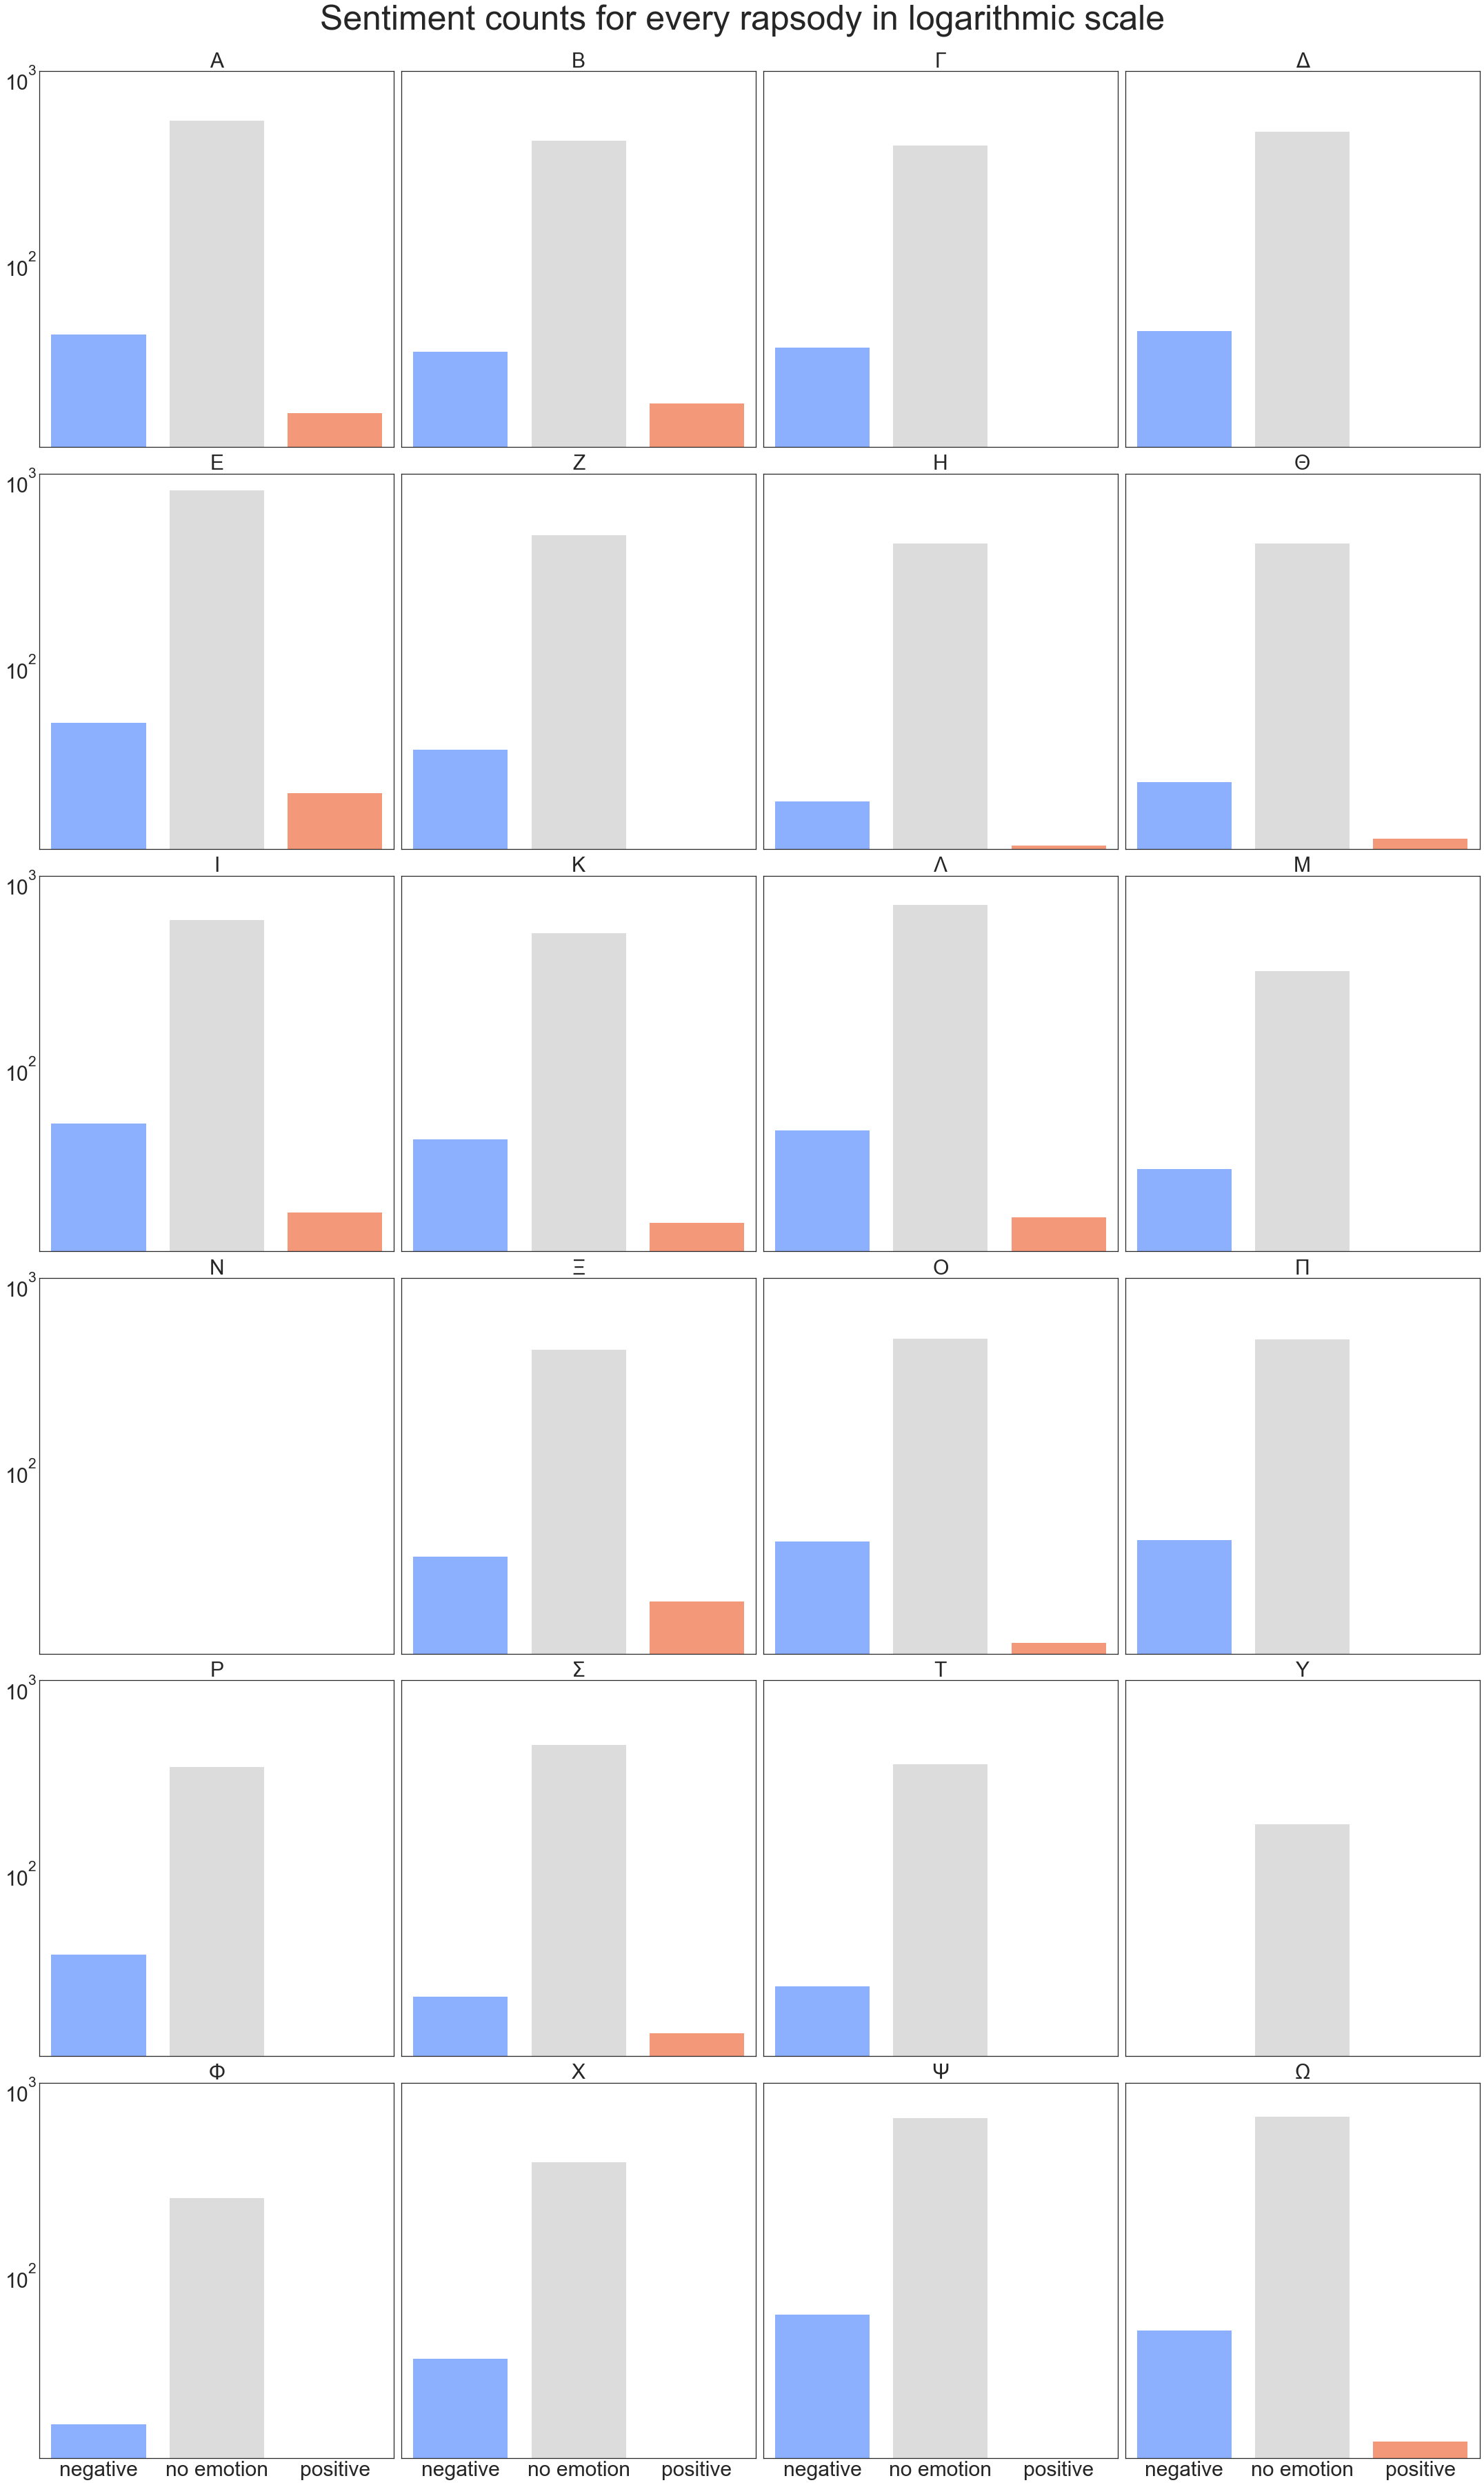

In [200]:
fig,ax = plt.subplots(nrows = 6, ncols=4, figsize=(30, 50), sharey=True, sharex=True)
# fig.subplots_adjust(hspace=0.4,wspace=0.5, top=0.4)
plt.style.use('seaborn-white')

i = 0
for row in ax:
    for col in row:
        raps = raps_titles[i]
        pol = iliada[raps + '_sent'][iliada[raps + '_sent'] != 'None'] # remove th None from the column
    
        sns.countplot(x=pol, ax=col, saturation=1, palette='coolwarm', log=True, order=['negative', 'no emotion', 'positive'])
        col.set_title(raps, fontsize=30)
        col.set_xlabel("")
        col.set_ylabel("")
        col.tick_params(axis='x', labelsize=30)
        col.tick_params(axis='y', labelsize=30)
        i += 1

fig.suptitle("Sentiment counts for every rapsody in logarithmic scale", fontsize=50, y=1)
fig.tight_layout()
plt.show()

In [109]:
# create a list with the mapped polarity with "positive", "negative" and "no emotion" 

weight = 0.33
pol_gold_sent = np.zeros(len(gold.mean_polarity)).astype(str)
for i in range(len(pol_gold_sent)):
    if gold.mean_polarity[i]  <= - weight: pol_gold_sent[i] = 'positive'
    elif gold.mean_polarity[i] >= weight: pol_gold_sent[i] = 'negative'
    else: pol_gold_sent[i] = "no emotion"

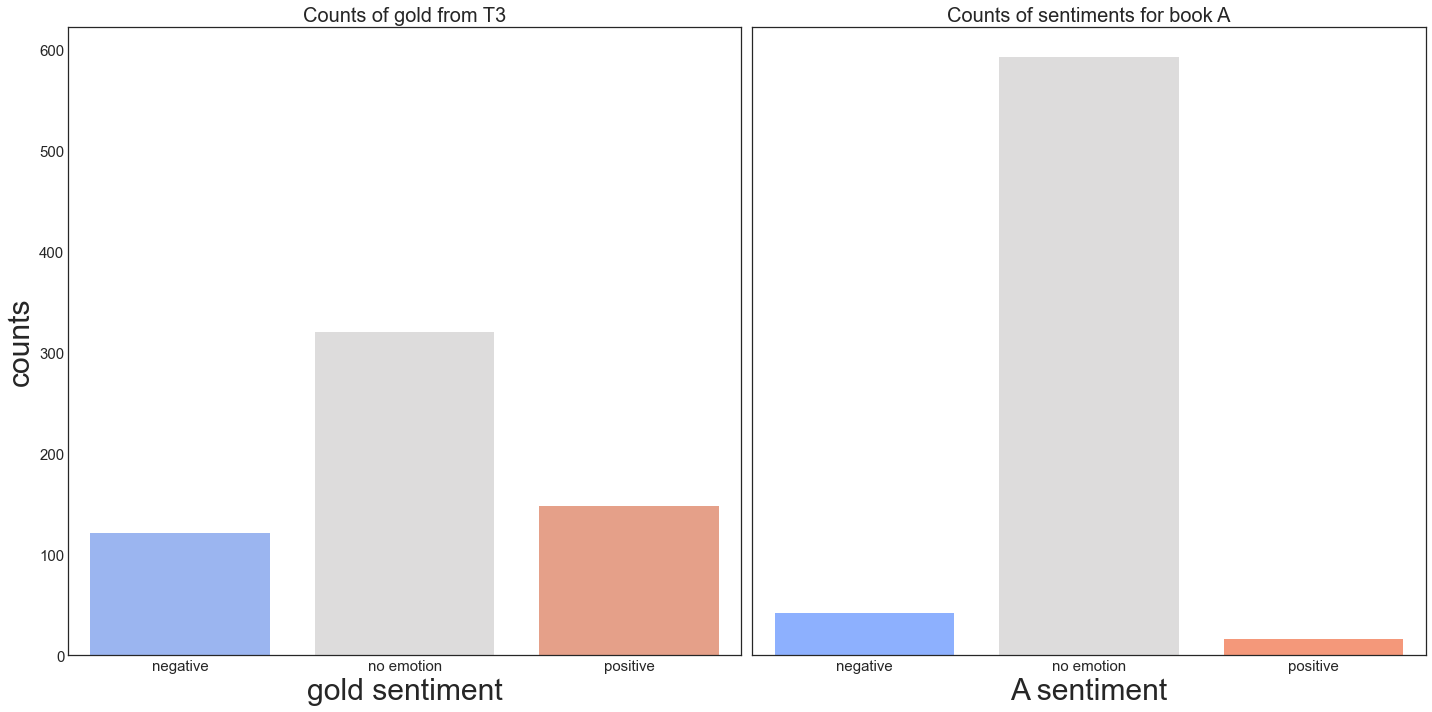

In [199]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10), sharey=True)

pol = iliada['Α_sent'][iliada['Α_sent'] != 'None'] # remove th None from the column

sns.countplot(x=pol_gold_sent, ax = ax[0], palette='coolwarm', order = ['negative', 'no emotion', 'positive'])
ax[0].set_title('Counts of gold from T3', fontsize=20)
ax[0].set_xlabel('gold sentiment', fontsize = 30)
ax[0].set_ylabel('counts', fontsize = 30)
ax[0].tick_params(axis='both', labelsize=15)

sns.countplot(x=pol, ax = ax[1], saturation=1, palette='coolwarm',  order = ['negative', 'no emotion', 'positive'])
ax[1].set_title('Counts of sentiments for book A', fontsize=20)
ax[1].set_xlabel('A sentiment', fontsize = 30)
ax[1].set_ylabel("")
ax[1].tick_params(axis='both', labelsize=15)

fig.tight_layout()
plt.show()

This is the plot of predictions for the first book of Iliad from the given translation and the gold annotations from the original translation. We see that we have much more "no emotion" in the predictions than that of the gold, indicating the model is not performing so well. Also, due to the fact that the second translation is a lot different from the original one, it is natural that our model can not perfom well to the words that does not know, and it maps a lot of verses to 0.

### Conclusion

The regression models for this task seem not to be very good. Perhaps this is due to the fact that the annotators are not quality annotators and may be have put a lot by chance. Also, in the problem with the sentiment polarity we have 3 distinct classes and we try to fit regression models to proedict these classes. A more efficient way to predict the class would be to perform classification with 3 classes. 